# Comparison between MAD-X and Measurement of the new T8 optics April 2023

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
import datetime
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 18
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

Text(0, 0.5, 'Beam size $\\sigma$ mm')

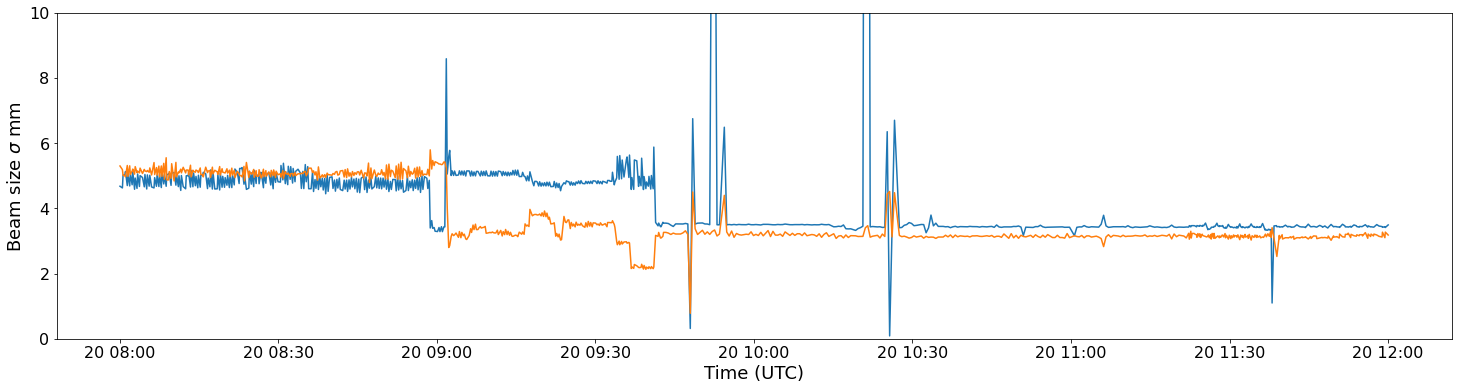

In [107]:
# build the query and load data into spark dataframe UTC Time
start = "2023-04-20 08:00:00.000"
end = "2023-04-20 12:00:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions").build().toPandas()

df = df.loc[df.selector == "CPS.USER.EAST3"]
df['datetime'] = pd.to_datetime(df['acqStamp'], unit='ns')
df.sort_values('datetime', inplace=True)

fig, ax = plt.subplots(figsize=(25,6))
ax.plot(df.datetime, df.HSigma)
ax.plot(df.datetime, df.VSigma)
ax.set_ylim(0,10)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Beam size $\sigma$ mm")

In [108]:
df1 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions").build().toPandas()
df2 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions").build().toPandas()
df3 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions").build().toPandas()
df4 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions").build().toPandas()

In [109]:
# list of devices
devices = ["PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions",
           "PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions",
           "PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions",
           "PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions"]

dataframes = []  # to store the dataframes

# loop over devices
for i, device in enumerate(devices, 1):
    df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter(device).build().toPandas()
    df = df.loc[df.selector == "CPS.USER.EAST3"]
    df['datetime'] = pd.to_datetime(df['acqStamp'], unit='ns')
    df.sort_values('datetime', inplace=True)
    
    # rename the columns for each device
    df.rename(columns={'HSigma': f'HSigma{i}', 'VSigma': f'VSigma{i}'}, inplace=True)
    
    dataframes.append(df)  # add dataframe to the list

# concat the dataframes
df_all = pd.concat(dataframes).sort_values('datetime')

# forward-fill and backward-fill NaN values
df_all.fillna(method='ffill', inplace=True)
df_all.fillna(method='bfill', inplace=True)


Text(0, 0.5, 'Beam size $\\sigma$ mm')

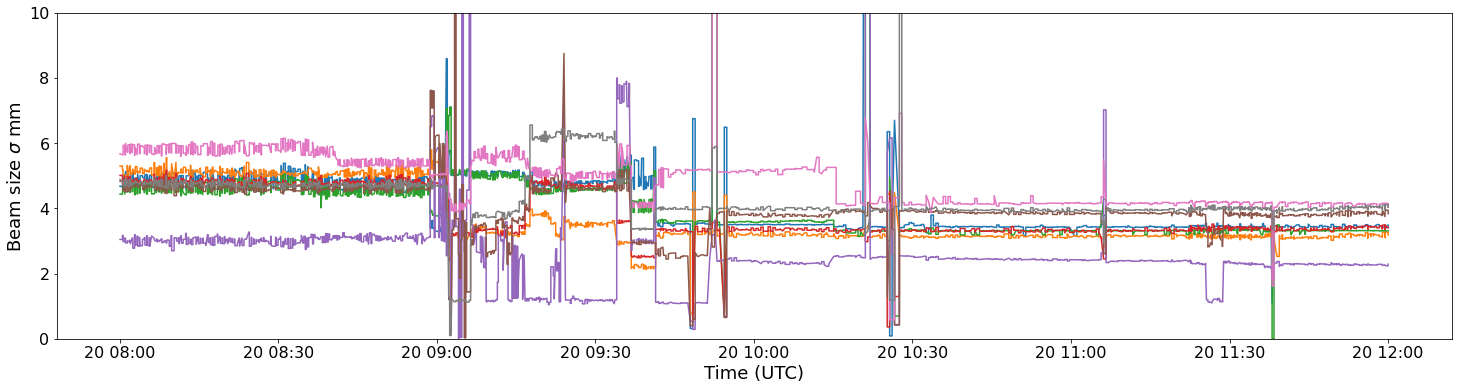

In [110]:
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(df_all.datetime, df_all.HSigma1)
ax.plot(df_all.datetime, df_all.VSigma1)

ax.plot(df_all.datetime, df_all.HSigma2)
ax.plot(df_all.datetime, df_all.VSigma2)

ax.plot(df_all.datetime, df_all.HSigma3)
ax.plot(df_all.datetime, df_all.VSigma3)

ax.plot(df_all.datetime, df_all.HSigma4)
ax.plot(df_all.datetime, df_all.VSigma4)

ax.set_ylim(0,10)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Beam size $\sigma$ mm")

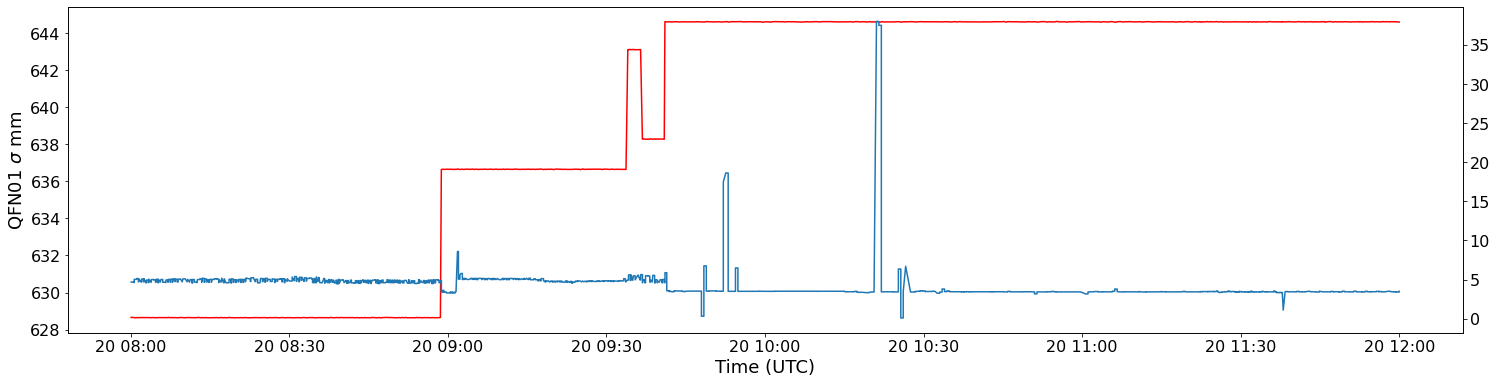

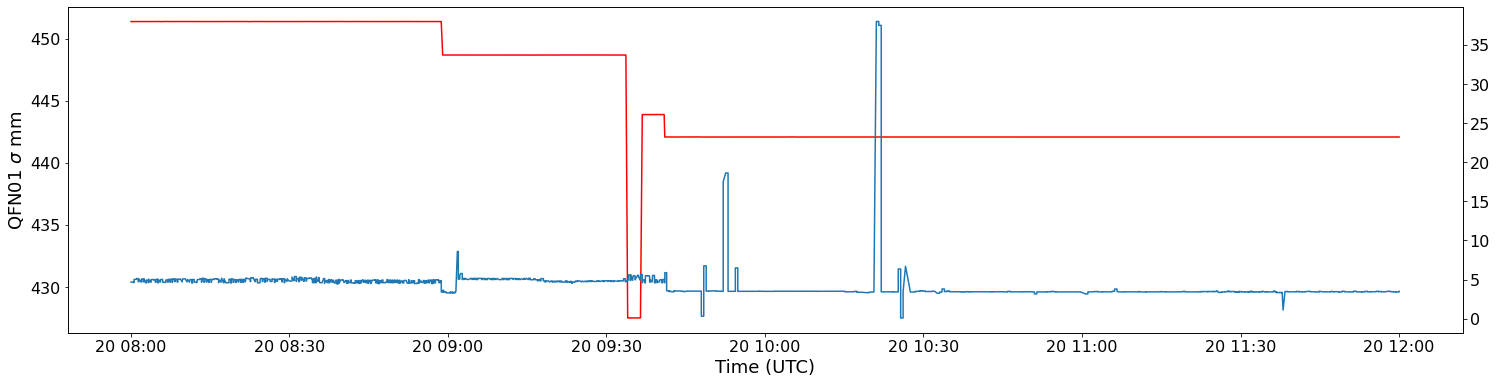

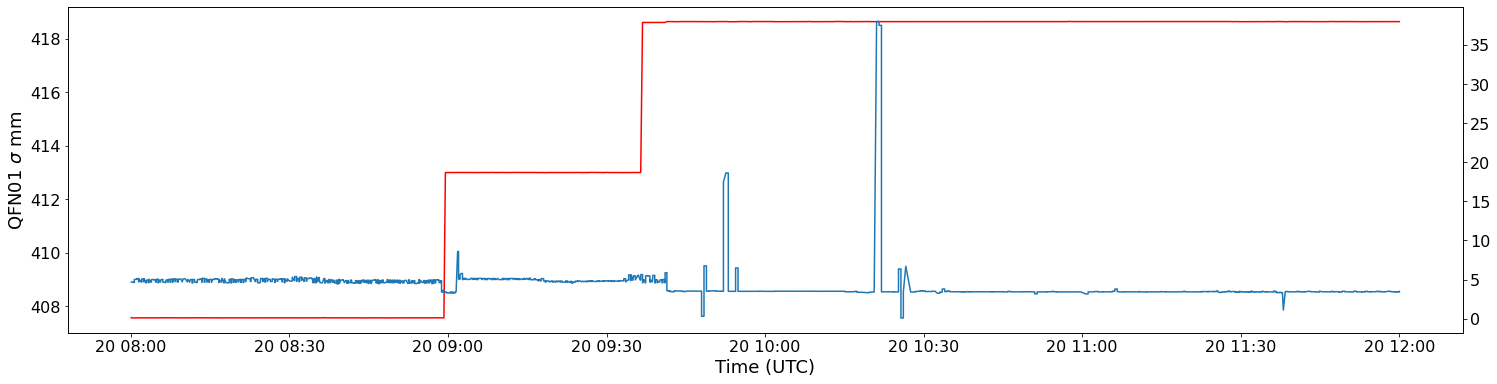

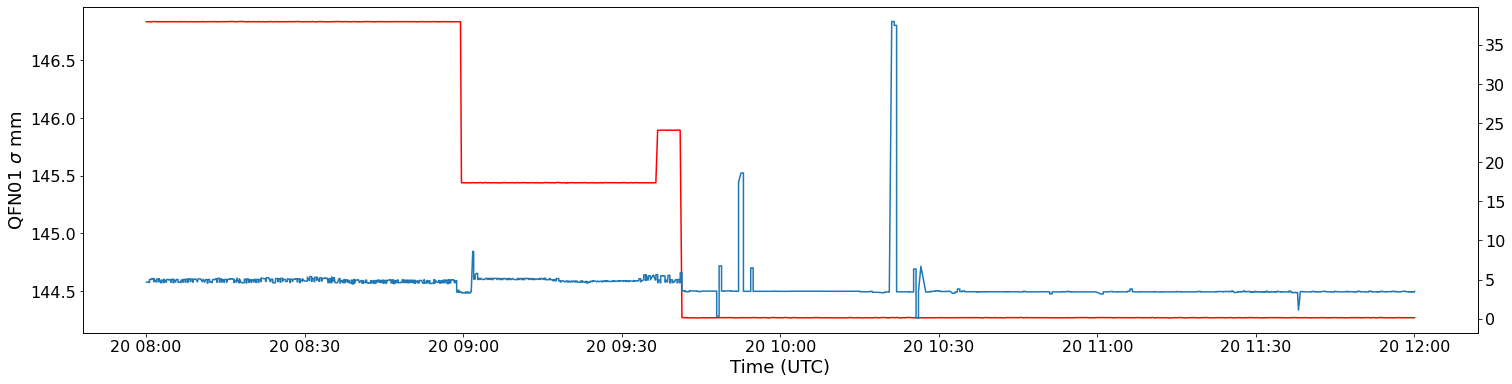

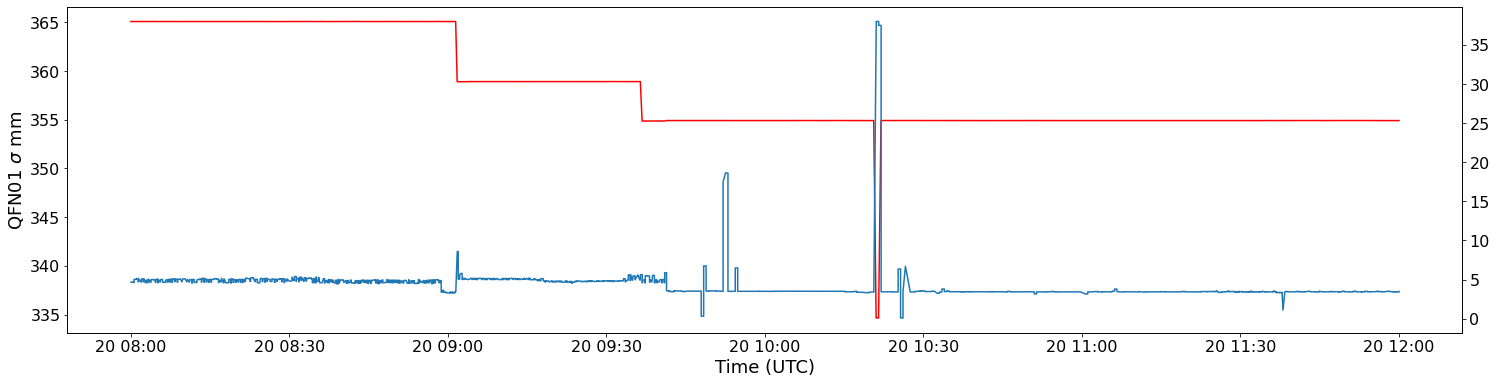

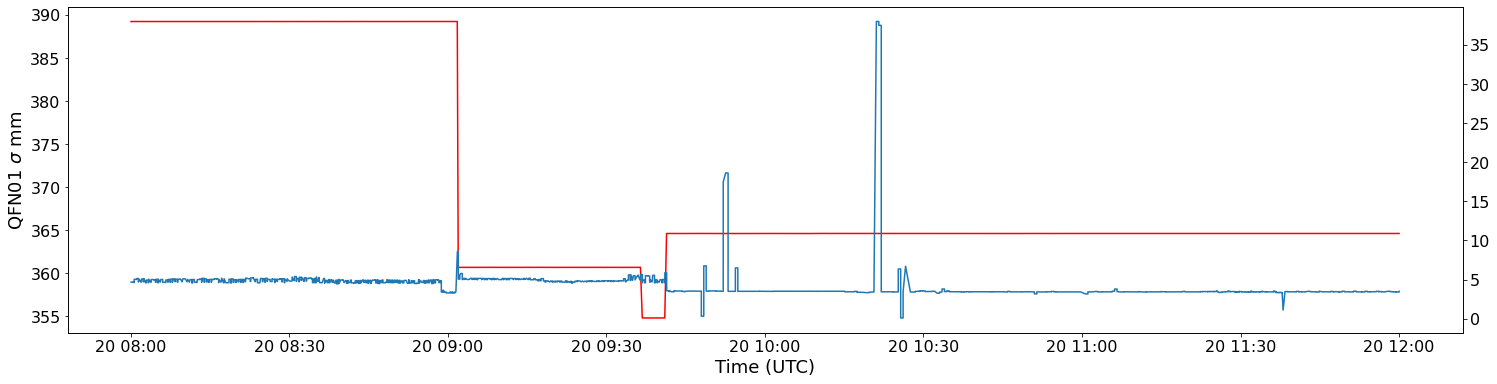

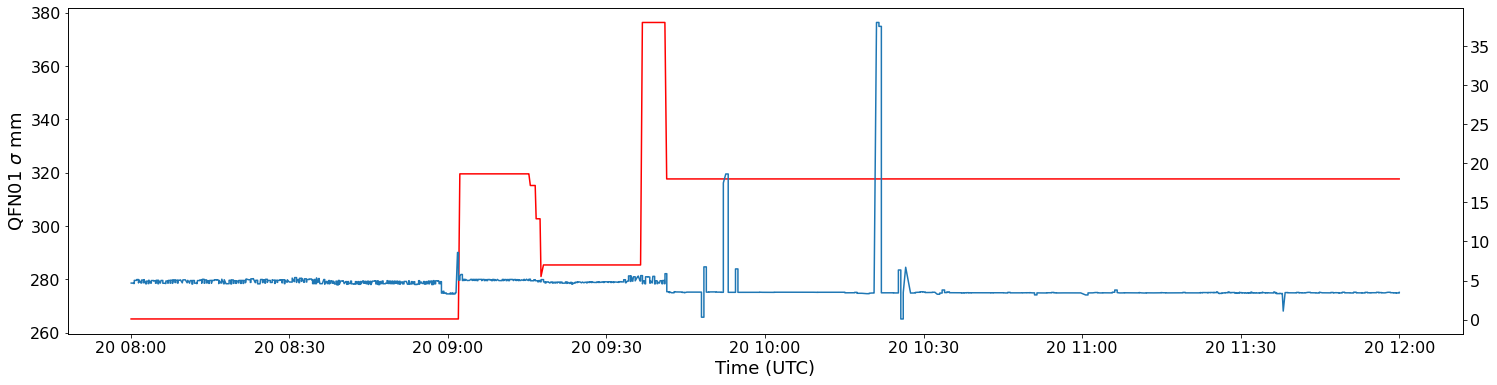

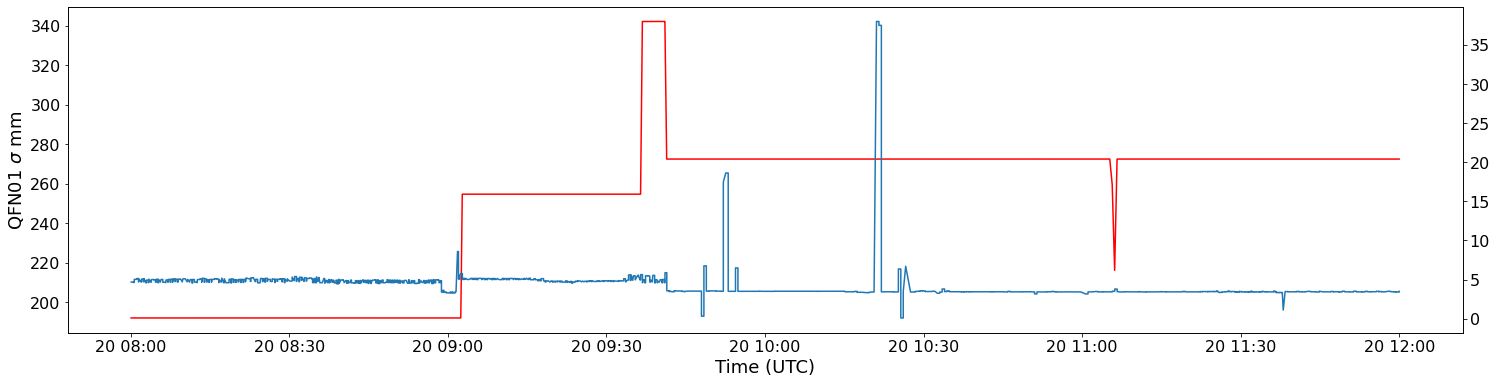

In [111]:
# build the query and load data into spark dataframe UTC Time
start = "2023-04-20 08:00:00.000"
end = "2023-04-20 12:00:00.000"

quadrupole_list = ["F61.QFN01/MEAS.PULSE",
                   "F61.QDN02/MEAS.PULSE",
                   "F61.QFN03/MEAS.PULSE",
                   "F61.QDN04/MEAS.PULSE",
                   "T8.QFN05/MEAS.PULSE",
                    "T8.QDN06/MEAS.PULSE",
                    "T8.QDN07/MEAS.PULSE",
                    "T8.QFN08/MEAS.PULSE",]

for quadrupole in quadrupole_list:


    df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter(quadrupole).build().toPandas()

    df = df.loc[df.selector == "CPS.USER.EAST3"]
    df['datetime'] = pd.to_datetime(df['acqStamp'], unit='ns')
    df.sort_values('datetime', inplace=True)
    
    fig, ax = plt.subplots(figsize=(25,6))
    ax.plot(df.datetime, df.VALUE, c="r")

    ax2 = ax.twinx()
    ax2.plot(df_all.datetime, df_all.HSigma1)

    ax.set_xlabel("Time (UTC)")
    ax.set_ylabel("QFN01 $\sigma$ mm")

In [112]:
quadrupole_list = ["F61.QFN01/MEAS.PULSE",
                   "F61.QDN02/MEAS.PULSE",
                   "F61.QFN03/MEAS.PULSE",
                   "F61.QDN04/MEAS.PULSE",
                   "T8.QFN05/MEAS.PULSE",
                   "T8.QDN06/MEAS.PULSE",
                   "T8.QDN07/MEAS.PULSE",
                   "T8.QFN08/MEAS.PULSE",]

# loop over quadrupole_list
for i, quadrupole in enumerate(quadrupole_list, 1):
    df_quad = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter(quadrupole).build().toPandas()
    df_quad = df_quad.loc[df_quad.selector == "CPS.USER.EAST3"]
    df_quad['datetime'] = pd.to_datetime(df_quad['acqStamp'], unit='ns')
    df_quad.sort_values('datetime', inplace=True)
    
    # rename the column 'VALUE' for each quadrupole
    df_quad.rename(columns={'VALUE': f'VALUE{i}'}, inplace=True)
    
    # merge the dataframe with the original one on 'datetime' column
    df_all = pd.merge_asof(df_all, df_quad, on='datetime', direction='nearest')

# forward-fill and backward-fill NaN values
df_all.fillna(method='ffill', inplace=True)
df_all.fillna(method='bfill', inplace=True)

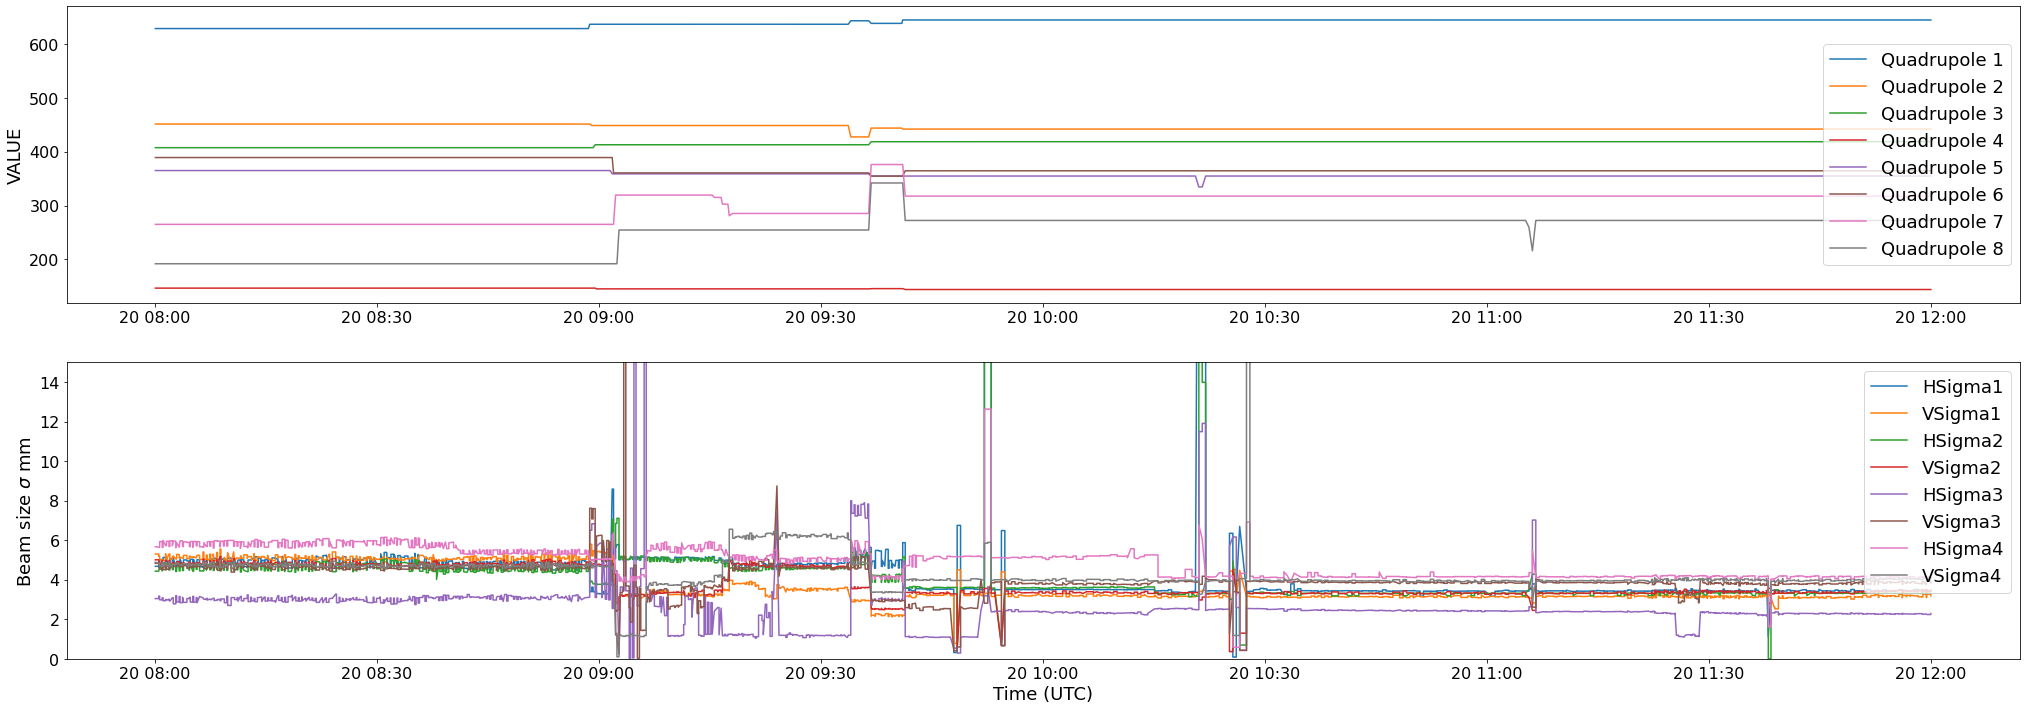

In [113]:
fig, axs = plt.subplots(2, 1, figsize=(35,12))  # Create 2 subplots, vertically stacked

# Plot all quadrupole VALUEs in the first subplot
for i in range(1, len(quadrupole_list) + 1):
    axs[0].plot(df_all.datetime, df_all[f'VALUE{i}'], label=f'Quadrupole {i}')
axs[0].set_ylabel("VALUE")
axs[0].legend()

# Plot all HSigma and VSigma in the second subplot
for i in range(1, len(devices) + 1):
    axs[1].plot(df_all.datetime, df_all[f'HSigma{i}'], label=f'HSigma{i}')
    axs[1].plot(df_all.datetime, df_all[f'VSigma{i}'], label=f'VSigma{i}')
axs[1].set_xlabel("Time (UTC)")
axs[1].set_ylabel("Beam size $\sigma$ mm")
axs[1].legend()
axs[1].set_ylim(0, 15)

plt.show()

# Create a new column with the strengths

In [114]:
# Define the list of columns to keep
cols_to_keep = ['HSigma1', 'VSigma1', 'HSigma2', 'VSigma2',
                'HSigma3', 'VSigma3', 'HSigma4', 'VSigma4',
                'VALUE1', 'VALUE2', 'VALUE3', 'VALUE4', 
                'VALUE5', 'VALUE6', 'VALUE7', 'VALUE8',
                'datetime']

# Select these columns
df_filtered = df_all[cols_to_keep]

# Define a dictionary mapping the old names to the new ones
name_mapping = {
    'VALUE1': 'iQFN1',
    'VALUE2': 'iQDN2',
    'VALUE3': 'iQFN3',
    'VALUE4': 'iQDN4',
    'VALUE5': 'iQFN5',
    'VALUE6': 'iQDN6',
    'VALUE7': 'iQDN7',
    'VALUE8': 'iQFN8',
}

# Rename the columns
df_filtered.rename(columns=name_mapping, inplace=True)
df_filtered.head(3)

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


HSigma1   VSigma1  HSigma2   VSigma2   HSigma3   VSigma3   HSigma4  \
0  4.678031  5.298228  4.43422  5.008216  3.045232  4.829728  5.673679   
1  4.678031  5.298228  4.43422  5.008216  3.045232  4.829728  5.673679   
2  4.678031  5.298228  4.43422  5.008216  3.045232  4.829728  5.673679   

    VSigma4       iQFN1       iQDN2       iQFN3       iQDN4       iQFN5  \
0  4.884657  628.657532  451.398651  407.560547  146.834503  365.096161   
1  4.884657  628.657532  451.398651  407.560547  146.834503  365.096161   
2  4.884657  628.657532  451.398651  407.560547  146.834503  365.096161   

        iQDN6       iQDN7       iQFN8                      datetime  
0  389.230042  265.207336  192.083374 2023-04-20 08:00:04.298238525  
1  389.230042  265.207336  192.083374 2023-04-20 08:00:04.298238525  
2  389.230042  265.207336  192.083374 2023-04-20 08:00:04.298238525

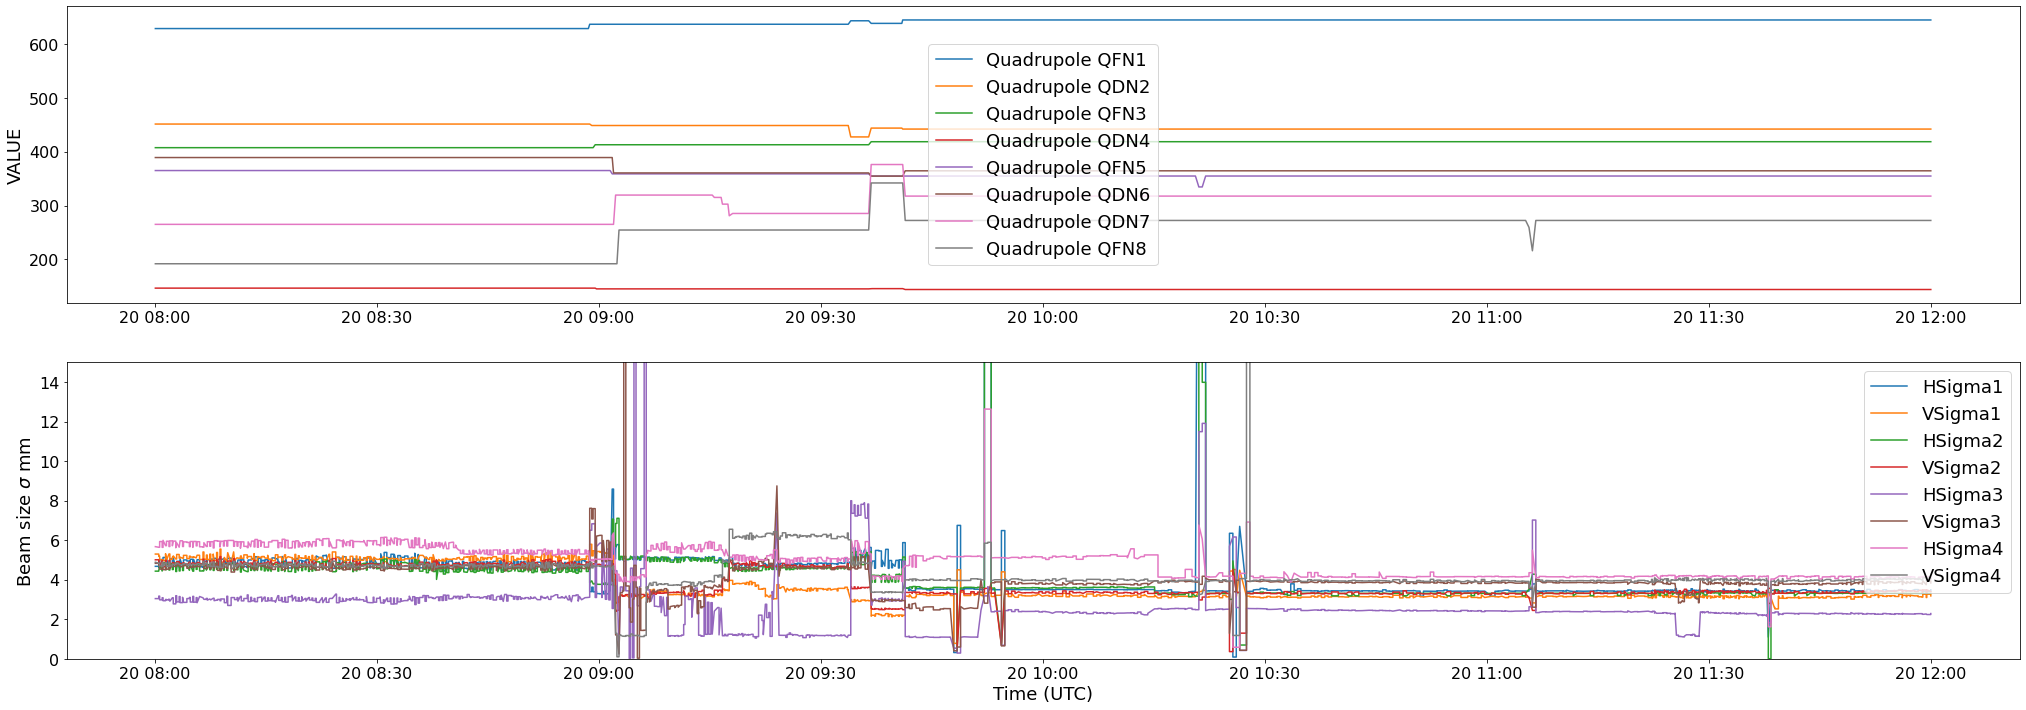

In [115]:
fig, axs = plt.subplots(2, 1, figsize=(35,12))  # Create 2 subplots, vertically stacked

# Define the correct order of quadrupole types
quad_type = ['QFN', 'QDN', 'QFN', 'QDN', 'QFN', 'QDN', 'QDN', 'QFN']

# Plot all quadrupole VALUEs in the first subplot
for i in range(8):  # Assuming you have 8 quadrupoles
    axs[0].plot(df_filtered.datetime, df_filtered[f'i{quad_type[i]}{i+1}'], 
                label=f'Quadrupole {quad_type[i]}{i+1}')
axs[0].set_ylabel("VALUE")
axs[0].legend()

# Plot all HSigma and VSigma in the second subplot
for i in range(1, 5):  # Assuming you have 4 devices
    axs[1].plot(df_filtered.datetime, df_filtered[f'HSigma{i}'], label=f'HSigma{i}')
    axs[1].plot(df_filtered.datetime, df_filtered[f'VSigma{i}'], label=f'VSigma{i}')
axs[1].set_xlabel("Time (UTC)")
axs[1].set_ylabel("Beam size $\sigma$ mm")
axs[1].legend()
axs[1].set_ylim(0, 15)

plt.show()


In [116]:
import sys
sys.path.append("/eos/home-e/eljohnso/SWAN_projects/madx-tools")
from transfer_function import *

quadrupole_to_magnet_type = {
    "iQFN1": "Q74L",
    "iQDN2": "Q120C",
    "iQFN3": "QFL",
    "iQDN4": "QFS",
    "iQFN5": "QFL",
    "iQDN6": "QFL",
    "iQDN7": "Q200L",
    "iQFN8": "Q200L",
}


Brho = 24*3.3356

for quadrupole, magnet_type in quadrupole_to_magnet_type.items():
    df_filtered[f'k1_{quadrupole[1:]}'] = k1(df_filtered[quadrupole], magnet_type, Brho)

df_filtered.tail(1)

/tmp/ipykernel_12434/435372732.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'k1_{quadrupole[1:]}'] = k1(df_filtered[quadrupole], magnet_type, Brho)


HSigma1   VSigma1   HSigma2   VSigma2   HSigma3   VSigma3  HSigma4  \
3027  3.490997  3.181401  3.309689  3.402032  2.288381  3.836843  4.03487   

       VSigma4       iQFN1       iQDN2  ...       iQFN8  \
3027  4.033607  644.592773  442.089539  ...  272.454407   

                          datetime   k1_QFN1   k1_QDN2   k1_QFN3  k1_QDN4  \
3027 2023-04-20 12:00:00.698238525  0.493521  0.187958  0.214997  0.07867   

       k1_QFN5   k1_QDN6   k1_QDN7   k1_QFN8  
3027  0.187308  0.191699  0.073242  0.062837  

[1 rows x 25 columns]

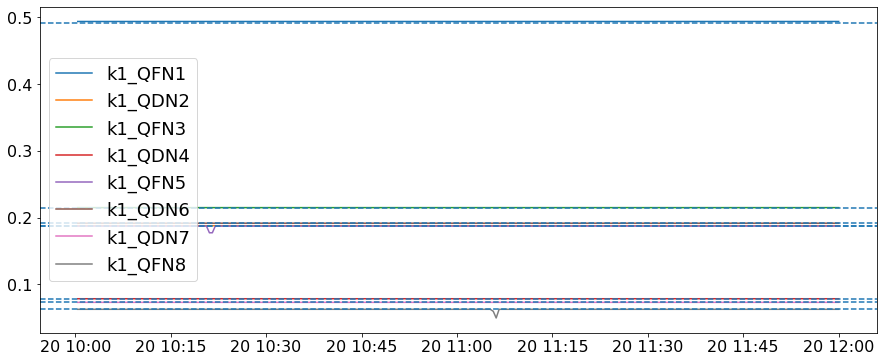

In [117]:
# Define theoretical values
theoretical_values = {
    'k1_QFN1': 0.49169,
    'k1_QDN2': 0.18725,
    'k1_QFN3': 0.2142,
    'k1_QDN4': 0.07838,
    'k1_QFN5': 0.1877,
    'k1_QDN6': 0.1922,
    'k1_QDN7': 0.07342,
    'k1_QFN8': 0.06299
}

# Create mask for times after 10:00
mask = df_filtered['datetime'].dt.time > datetime.datetime.strptime("10:00", "%H:%M").time()


# Subset dataframe
df_filtered_after_10 = df_filtered[mask]

# Plot
fig, ax = plt.subplots(figsize=(15,6))

# Loop through each quadrupole and plot
for quadrupole, k1_value in theoretical_values.items():
    ax.plot(df_filtered_after_10.datetime, df_filtered_after_10[quadrupole], label=f'{quadrupole}')
    # Plot theoretical values as horizontal lines
    ax.axhline(k1_value, color='C0', linestyle='--') 

ax.legend()
plt.show()


The quadrupole value is not exactly the same value as I wrote down using MAD-X. Maybe it's the Brho definition ? If it is, they should all be offset by the same amount. Actually, only the first quadrupole has a large difference

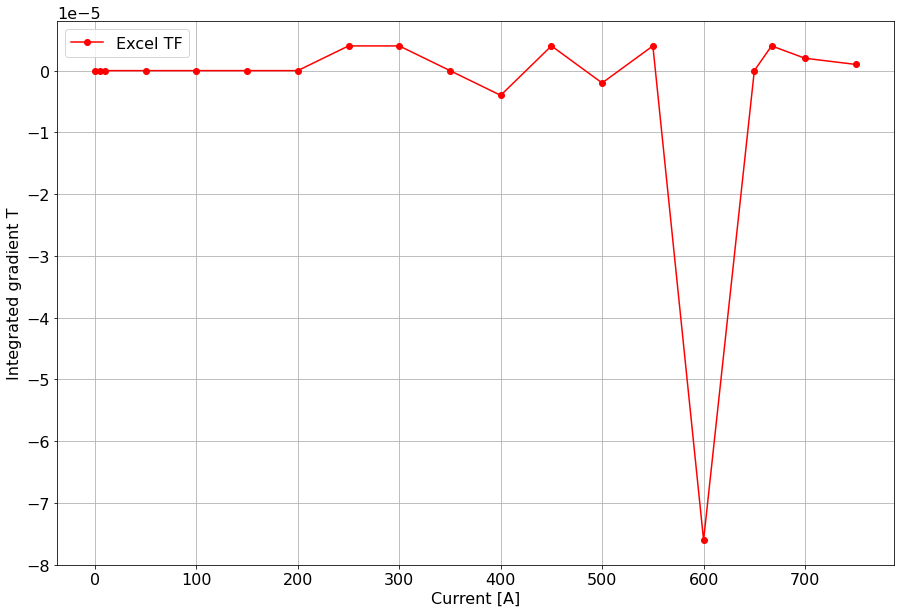

In [118]:
# Define data
data = {
    'T': [0.0, 0.2619, 
          0.492968, 2.358847, 4.710821, 7.068205, 9.426532, 11.78079, 14.13198, 16.4773, 18.81478, 21.13309, 
          23.41606, 25.61793, 27.63888, 29.43015, 29.981, 30.98712, 32.34721],
    'A': [0.0, 5.000978, 10.000304, 50.002003, 100.001404, 150.001373, 200.00238, 
          250.005432, 299.993652, 350.001648, 399.995728, 449.994446, 499.997375, 549.999878, 599.994873, 
          650.004211, 666.999146, 699.991455, 749.998169]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)


A_Q74L = [0.0,
    5.000978,
    10.000304,
    50.002003,
    100.001404,
    150.001373,
    200.00238,
    250.005432,
    299.993652,
    350.001648,
    399.995728,
    449.994446,
    499.997375,
    549.999878,
    599.994873,
    650.004211,
    666.999146,
    699.991455,
    749.998169,]
    
T_Q74L = [0.0,
0.2619,
0.492968,
2.358847,
4.710821,
7.068205,
9.426532,
11.780794,
14.131984,
16.4773,
18.814776,
21.133094,
23.416058,
25.617934,
27.638804,
29.43015,
29.981004,
30.987122,
32.347211,]


# Plot
plt.figure(figsize=(15, 10))
# plt.plot(df['A'], df['T'], marker="o", c="b", label="logical")

plt.plot(A_Q74L, T_Q74L-df['T'], marker="o", c="r", label="Excel TF")

plt.xlabel('Current [A]', fontsize = 16)
plt.ylabel('Integrated gradient T', fontsize = 16)
plt.grid(True)

plt.legend(fontsize=16)
plt.show()

# Draw the optics

Now I have a dataframe containing the datetime and the K1 strength of the quadrupoles as well as the beam size measurement. I can now plot the optics and the twiss and compare them to the beam size measurement

In [119]:
from cpymad.madx import Madx
from pybt.tools.plotters import *
import importlib
import sys
sys.path.append("/eos/home-e/eljohnso/SWAN_projects/madx-tools")
import plot_tool
from plot_tool import *

def plot_data(ax, x, y, color="k", marker="x"):
    ax.plot(x, y, marker=marker, color=color)
    ax.plot(x, -y, marker=marker, color=color)

fontsize = 16
    
# Beam characteristics
gamma = 25.598474067
beta = np.sqrt(1-gamma**(-2))
exn = 4.92e-06
eyn = 3.4e-06
sige = 0.000412
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
Brho = 24*3.3356

# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("/eos/user/e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.str")
madx.call("/eos/user/e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.seq")

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')


madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,APER_3,APER_4,APERTYPE,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx.input('SEQEDIT, SEQUENCE=f61t8_op;')
madx.input('FLATTEN;')
madx.input('REMOVE, ELEMENT=ARBMATRIX;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.input("F62.BTV002 : MARKER;")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.command.install(element = 'F62.BTV002', at=1.250107+0.406, from_="F61.MBXHD033")
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.use(sequence="f61t8_op")

Text(0, 0.5, '$\\sigma_{V}$ [m]')

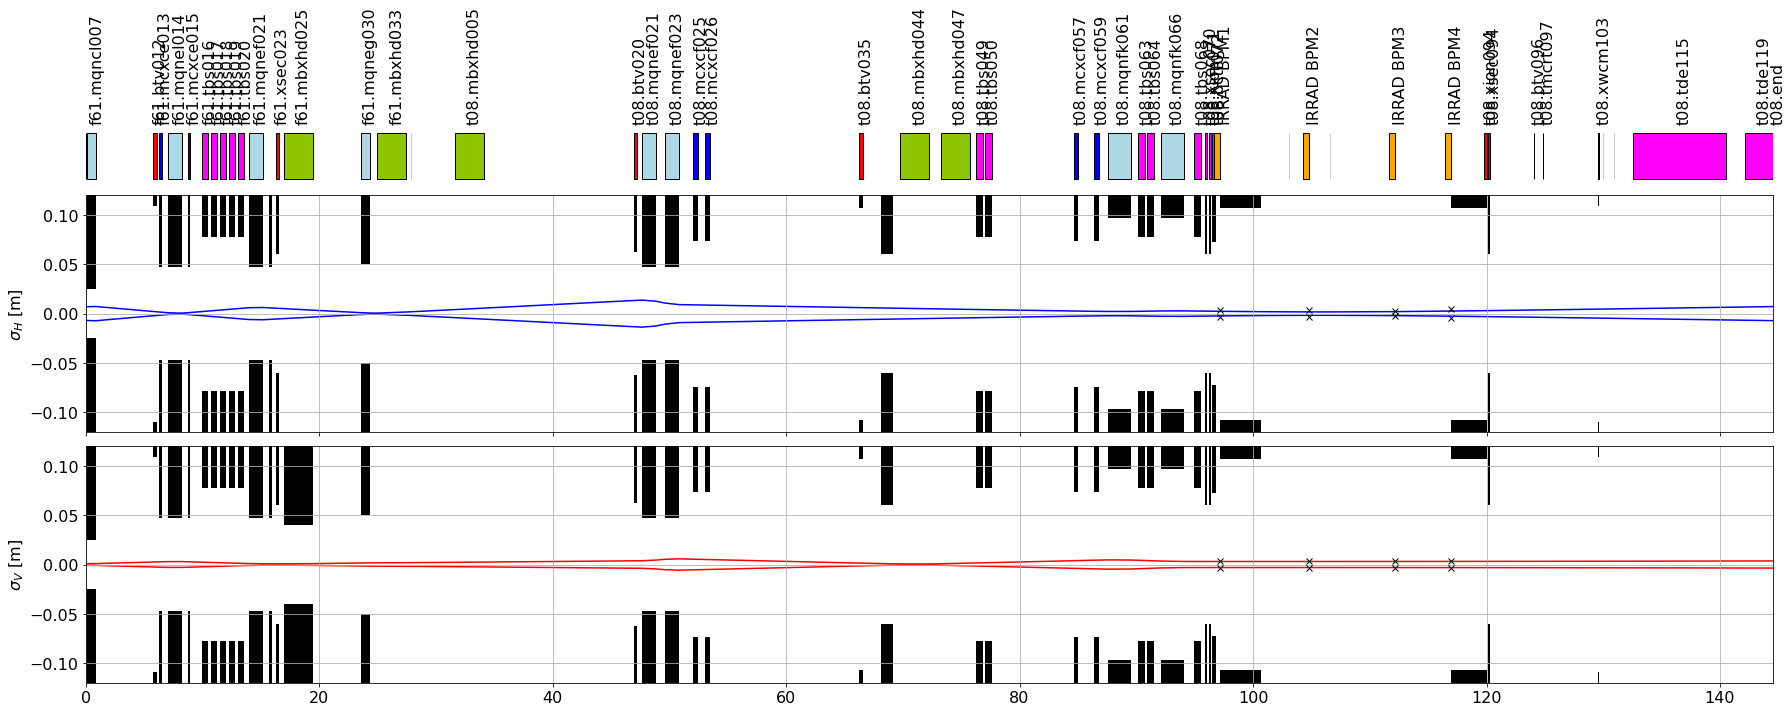

In [120]:
acq_number = 2000

madx.input("kQFN1 = " + str(df_filtered.k1_QFN1[acq_number]) + ";")
madx.input("kQDN2 = " + str(-df_filtered.k1_QDN2[acq_number]) + ";")
madx.input("kQFN3 = " + str(df_filtered.k1_QFN3[acq_number]) + ";")
madx.input("kQDN4 = " + str(-df_filtered.k1_QDN4[acq_number]) + ";")
madx.input("kQFN5 = " + str(df_filtered.k1_QFN5[acq_number]) + ";")
madx.input("kQDN6 = " + str(-df_filtered.k1_QDN6[acq_number]) + ";")
madx.input("kQDN7 = " + str(-df_filtered.k1_QDN7[acq_number]) + ";")
madx.input("kQFN8 = " + str(df_filtered.k1_QFN8[acq_number]) + ";")

fig, ax = plt.subplots(3,1, figsize=(25,10), tight_layout=False, sharex=True, height_ratios=[1,3,3])

twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

draw_synoptic(ax[0], twiss_f61)
ax[0].set_xlim(0, twiss_f61.s[-1])
ax[0].set_ylim(-0.02, 1.)
ax[0].axis("off")

ax[1].plot(twiss_f61['s'], beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, 1), alpha=1.0, color="b",
           zorder=0)
ax[1].plot(twiss_f61['s'], -beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, 1), alpha=1.0, color="b",
           zorder=0)
draw_aperture_circle(ax[1], twiss_f61, "aper_1")
draw_aperture_rectangle(ax[1], twiss_f61, "aper_1")

# IRRAD BPM
plot_data(ax[1], twiss_f61.loc["t08.bpm073"].s, df_filtered.HSigma1[acq_number] / 1000)
plot_data(ax[1], twiss_f61.loc["t08.bpm080"].s, df_filtered.HSigma2[acq_number] / 1000)
plot_data(ax[1], twiss_f61.loc["t08.bpm085"].s, df_filtered.HSigma3[acq_number] / 1000)
plot_data(ax[1], twiss_f61.loc["t08.bpm092"].s, df_filtered.HSigma4[acq_number] / 1000)

ax[1].set_xlim(0, twiss_f61.s[-1])

ax[2].plot(twiss_f61['s'], beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, 1) + twiss_f61.y, alpha=1.0,
           color="r", zorder=0)
ax[2].plot(twiss_f61['s'], -beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, 1) + twiss_f61.y, alpha=1.0,
           color="r", zorder=0)
draw_aperture_circle(ax[2], twiss_f61, "aper_1")
draw_aperture_rectangle(ax[2], twiss_f61, "aper_2")
plot_data(ax[2], twiss_f61.loc["t08.bpm073"].s, df_filtered.VSigma1[acq_number] / 1000)
plot_data(ax[2], twiss_f61.loc["t08.bpm080"].s, df_filtered.VSigma2[acq_number] / 1000)
plot_data(ax[2], twiss_f61.loc["t08.bpm085"].s, df_filtered.VSigma3[acq_number] / 1000)
plot_data(ax[2], twiss_f61.loc["t08.bpm092"].s, df_filtered.VSigma4[acq_number] / 1000)
ax[2].set_xlim(0, twiss_f61.s[-1])

ax[1].grid()
ax[1].set_ylim(-0.12, 0.12)
ax[1].set_ylabel(r"$\sigma_{H}$ [m]", fontsize=fontsize)

ax[2].grid()
ax[2].set_ylim(-0.12, 0.12)
ax[2].set_ylabel(r"$\sigma_{V}$ [m]", fontsize=fontsize)

# Calculate the MAD-X beam size
Let's calculate the beam size predicted by MAD-X and store it in a dataframe so that we can use it later to plot stuff.

In [121]:
for acq_number in range(100):

    madx.input("kQFN1 = " + str(df_filtered.k1_QFN1[acq_number]) + ";")
    madx.input("kQDN2 = " + str(-df_filtered.k1_QDN2[acq_number]) + ";")
    madx.input("kQFN3 = " + str(df_filtered.k1_QFN3[acq_number]) + ";")
    madx.input("kQDN4 = " + str(-df_filtered.k1_QDN4[acq_number]) + ";")
    madx.input("kQFN5 = " + str(df_filtered.k1_QFN5[acq_number]) + ";")
    madx.input("kQDN6 = " + str(-df_filtered.k1_QDN6[acq_number]) + ";")
    madx.input("kQDN7 = " + str(-df_filtered.k1_QDN7[acq_number]) + ";")
    madx.input("kQFN8 = " + str(df_filtered.k1_QFN8[acq_number]) + ";")

    twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

    HSigma1_MAD = beam_size(twiss_f61.loc["t08.bpm073"]['betx'], twiss_f61.loc["t08.bpm073"]['dx'], ex, sige, 1)*1000
    HSigma2_MAD = beam_size(twiss_f61.loc["t08.bpm080"]['betx'], twiss_f61.loc["t08.bpm080"]['dx'], ex, sige, 1)*1000
    HSigma3_MAD = beam_size(twiss_f61.loc["t08.bpm085"]['betx'], twiss_f61.loc["t08.bpm085"]['dx'], ex, sige, 1)*1000
    HSigma4_MAD = beam_size(twiss_f61.loc["t08.bpm092"]['betx'], twiss_f61.loc["t08.bpm092"]['dx'], ex, sige, 1)*1000
    
    VSigma1_MAD = beam_size(twiss_f61.loc["t08.bpm073"]['bety'], twiss_f61.loc["t08.bpm073"]['dy'], ey, sige, 1)*1000
    VSigma2_MAD = beam_size(twiss_f61.loc["t08.bpm080"]['bety'], twiss_f61.loc["t08.bpm080"]['dy'], ey, sige, 1)*1000
    VSigma3_MAD = beam_size(twiss_f61.loc["t08.bpm085"]['bety'], twiss_f61.loc["t08.bpm085"]['dy'], ey, sige, 1)*1000
    VSigma4_MAD = beam_size(twiss_f61.loc["t08.bpm092"]['bety'], twiss_f61.loc["t08.bpm092"]['dy'], ey, sige, 1)*1000


In [122]:
for quadrupole, magnet_type in quadrupole_to_magnet_type.items():
    df_filtered[f'k1_{quadrupole[1:]}'] = k1(df_filtered[quadrupole], magnet_type, Brho)

/tmp/ipykernel_12434/2528617357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'k1_{quadrupole[1:]}'] = k1(df_filtered[quadrupole], magnet_type, Brho)


In [123]:
def calculate_Sigma(row):
    madx.input("kQFN1 = " + str(row['k1_QFN1']) + ";")
    madx.input("kQDN2 = " + str(-row['k1_QDN2']) + ";")
    madx.input("kQFN3 = " + str(row['k1_QFN3']) + ";")
    madx.input("kQDN4 = " + str(-row['k1_QDN4']) + ";")
    madx.input("kQFN5 = " + str(row['k1_QFN5']) + ";")
    madx.input("kQDN6 = " + str(-row['k1_QDN6']) + ";")
    madx.input("kQDN7 = " + str(-row['k1_QDN7']) + ";")
    madx.input("kQFN8 = " + str(row['k1_QFN8']) + ";")

    twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

    HSigma1_MAD = beam_size(twiss_f61.loc["t08.bpm073"]['betx'], twiss_f61.loc["t08.bpm073"]['dx'], ex, sige, 1) * 1000
    HSigma2_MAD = beam_size(twiss_f61.loc["t08.bpm080"]['betx'], twiss_f61.loc["t08.bpm080"]['dx'], ex, sige, 1) * 1000
    HSigma3_MAD = beam_size(twiss_f61.loc["t08.bpm085"]['betx'], twiss_f61.loc["t08.bpm085"]['dx'], ex, sige, 1) * 1000
    HSigma4_MAD = beam_size(twiss_f61.loc["t08.bpm092"]['betx'], twiss_f61.loc["t08.bpm092"]['dx'], ex, sige, 1) * 1000
    
    VSigma1_MAD = beam_size(twiss_f61.loc["t08.bpm073"]['bety'], twiss_f61.loc["t08.bpm073"]['dy'], ey, sige, 1)*1000
    VSigma2_MAD = beam_size(twiss_f61.loc["t08.bpm080"]['bety'], twiss_f61.loc["t08.bpm080"]['dy'], ey, sige, 1)*1000
    VSigma3_MAD = beam_size(twiss_f61.loc["t08.bpm085"]['bety'], twiss_f61.loc["t08.bpm085"]['dy'], ey, sige, 1)*1000
    VSigma4_MAD = beam_size(twiss_f61.loc["t08.bpm092"]['bety'], twiss_f61.loc["t08.bpm092"]['dy'], ey, sige, 1)*1000

    return HSigma1_MAD, HSigma2_MAD, HSigma3_MAD, HSigma4_MAD, VSigma1_MAD, VSigma2_MAD, VSigma3_MAD, VSigma4_MAD

df_filtered[['HSigma1_MAD', 'HSigma2_MAD', 'HSigma3_MAD', 'HSigma4_MAD', 'VSigma1_MAD', 'VSigma2_MAD', 'VSigma3_MAD', 'VSigma4_MAD']] = df_filtered.apply(calculate_Sigma, axis=1, result_type='expand')

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


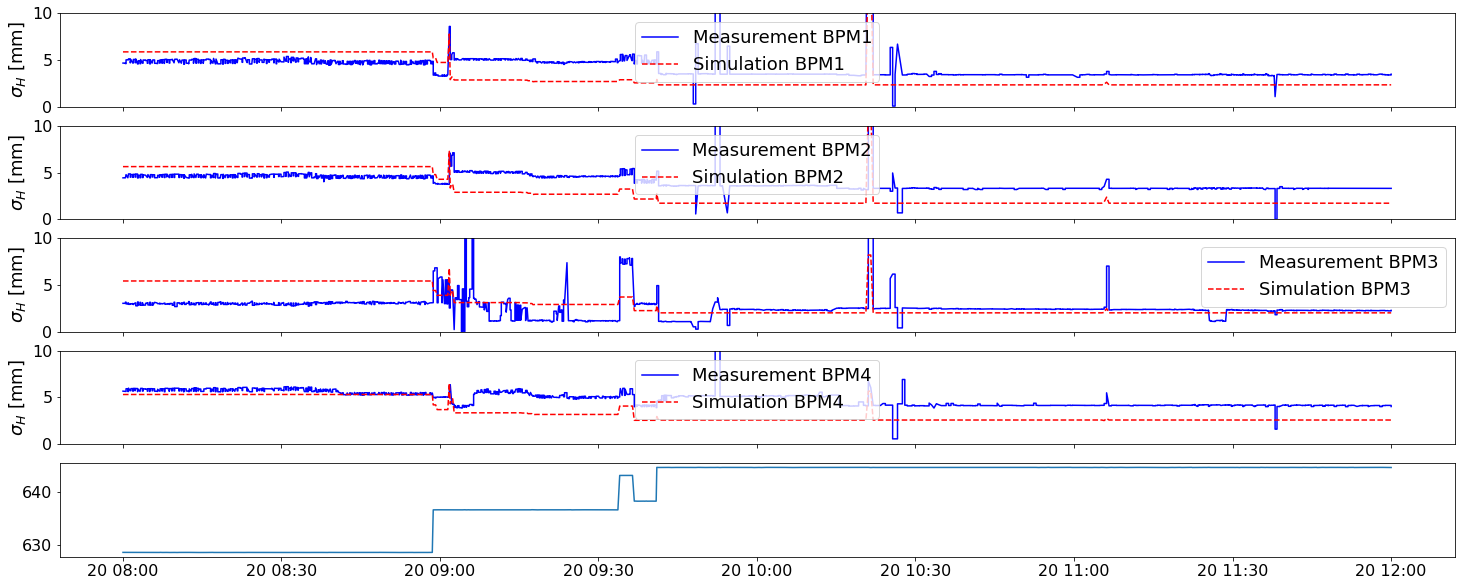

In [124]:
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(25, 10))

for i in range(4):
    ax[i].plot(df_filtered.datetime, df_filtered[f'HSigma{i+1}'], label=f"Measurement BPM{i+1}", c="b")
    ax[i].plot(df_filtered.datetime, df_filtered[f'HSigma{i+1}_MAD'], label=f"Simulation BPM{i+1}", c="r", ls="--")
    ax[i].legend()
    ax[i].set_ylim(0, 10)
    ax[i].set_ylabel("$\sigma_{H}$ [mm]")

ax[4].plot(df_filtered.datetime, df_filtered.iQFN1)
# ax[4].plot(df_filtered.datetime, df_filtered.iQDN2)
# ax[4].plot(df_filtered.datetime, df_filtered.iQFN3)
# ax[4].plot(df_filtered.datetime, df_filtered.iQDN4)

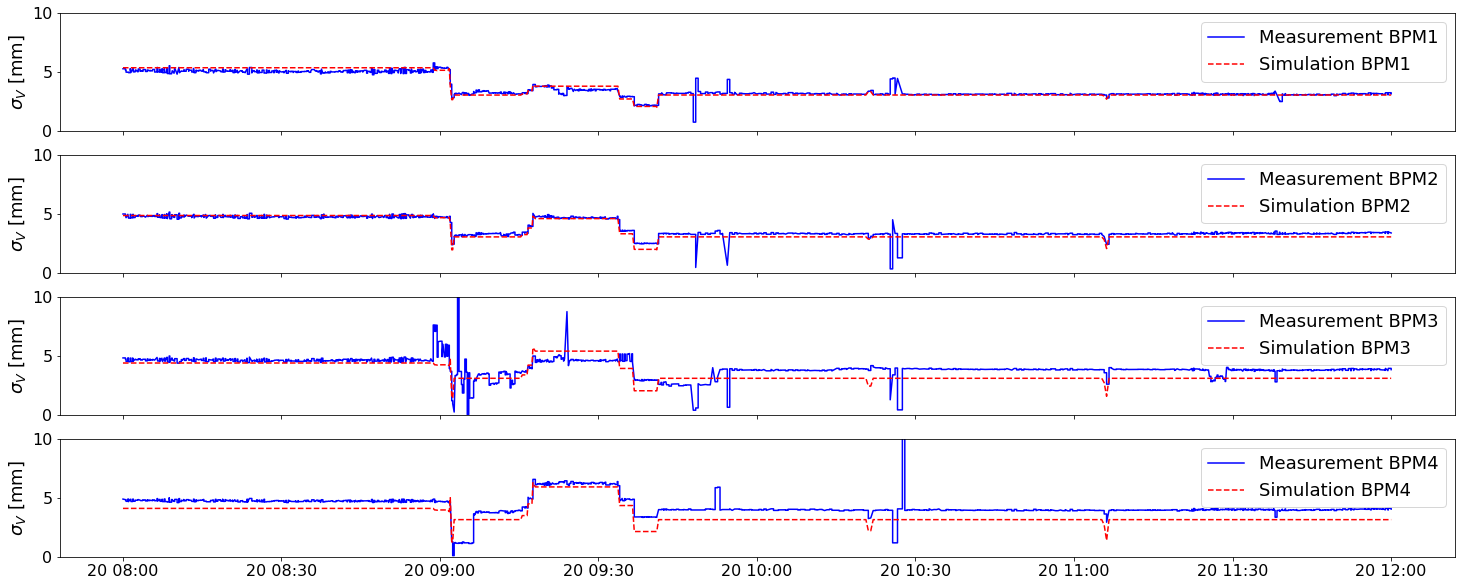

In [125]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(25, 10))

for i in range(4):
    ax[i].plot(df_filtered.datetime, df_filtered[f'VSigma{i+1}'], label=f"Measurement BPM{i+1}", c="b")
    ax[i].plot(df_filtered.datetime, df_filtered[f'VSigma{i+1}_MAD'], label=f"Simulation BPM{i+1}", c="r", ls="--")
    ax[i].legend()
    ax[i].set_ylim(0, 10)
    ax[i].set_ylabel("$\sigma_{V}$ [mm]")

# Plotting region with the final optics

Text(0, 0.5, 'QFN01 [A]')

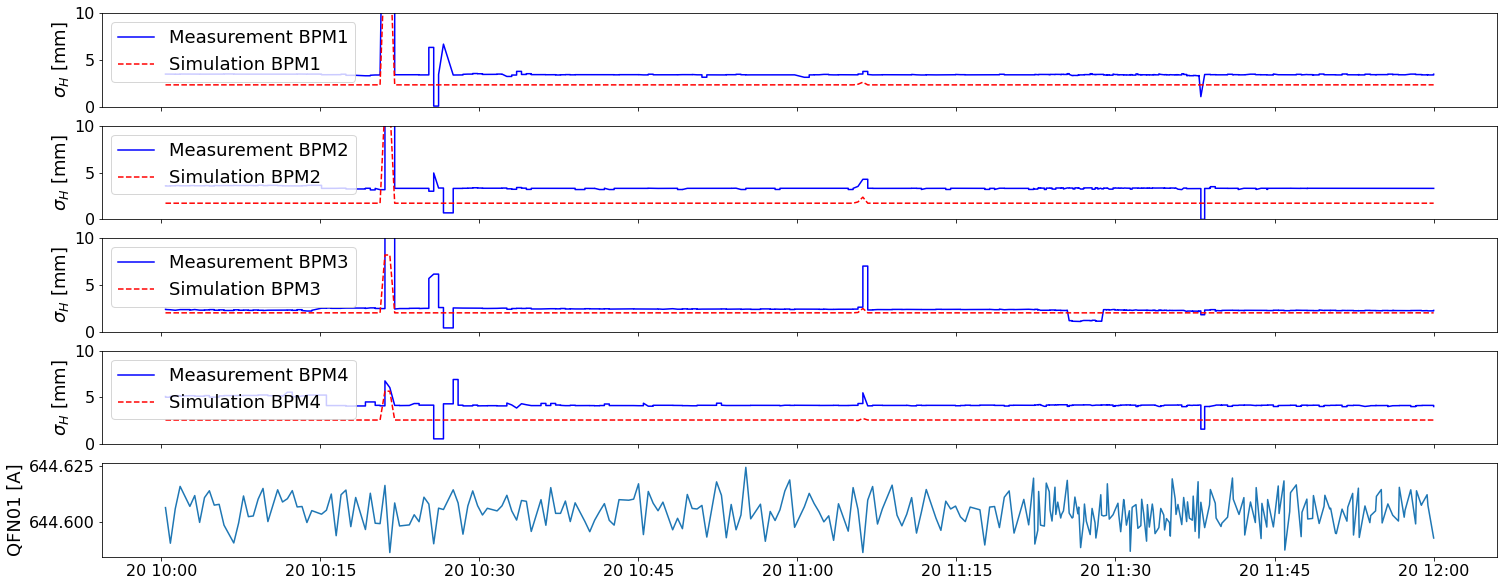

In [126]:
# Create mask for times after 10:00
mask = df_filtered['datetime'].dt.time > datetime.datetime.strptime("10:00", "%H:%M").time()

# Subset dataframe
df_filtered_after_10 = df_filtered[mask]

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(25, 10))

for i in range(4):
    ax[i].plot(df_filtered_after_10.datetime, df_filtered_after_10[f'HSigma{i+1}'], label=f"Measurement BPM{i+1}", c="b")
    ax[i].plot(df_filtered_after_10.datetime, df_filtered_after_10[f'HSigma{i+1}_MAD'], label=f"Simulation BPM{i+1}", c="r", ls="--")
    ax[i].legend(loc="upper left")
    ax[i].set_ylim(0, 10)
    ax[i].set_ylabel("$\sigma_{H}$ [mm]")

ax[4].plot(df_filtered_after_10.datetime, df_filtered_after_10.iQFN1)
ax[4].set_ylabel("QFN01 [A]")

Text(0, 0.5, 'QFN01 [A]')

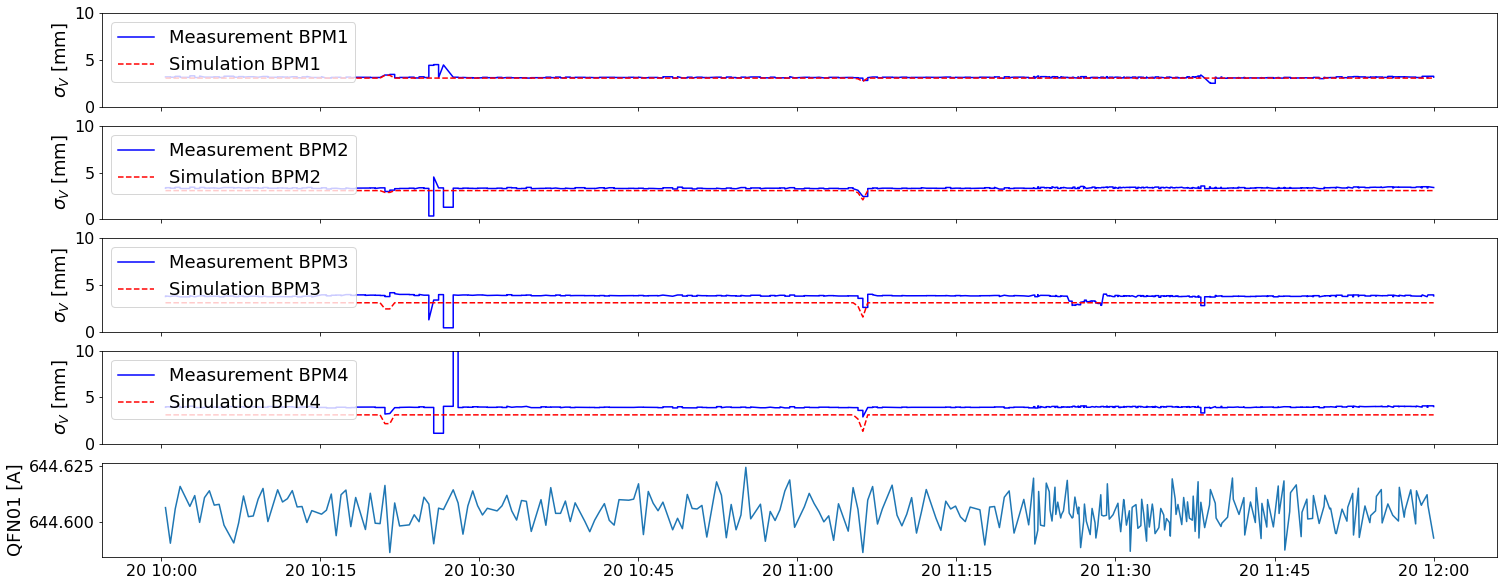

In [127]:
# Create mask for times after 10:00
mask = df_filtered['datetime'].dt.time > datetime.datetime.strptime("10:00", "%H:%M").time()


# Subset dataframe
df_filtered_after_10 = df_filtered[mask]

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(25, 10))

for i in range(4):
    ax[i].plot(df_filtered_after_10.datetime, df_filtered_after_10[f'VSigma{i+1}'], label=f"Measurement BPM{i+1}", c="b")
    ax[i].plot(df_filtered_after_10.datetime, df_filtered_after_10[f'VSigma{i+1}_MAD'], label=f"Simulation BPM{i+1}", c="r", ls="--")
    ax[i].legend(loc="upper left")
    ax[i].set_ylim(0, 10)
    ax[i].set_ylabel("$\sigma_{V}$ [mm]")

ax[4].plot(df_filtered_after_10.datetime, df_filtered_after_10.iQFN1)
ax[4].set_ylabel("QFN01 [A]")

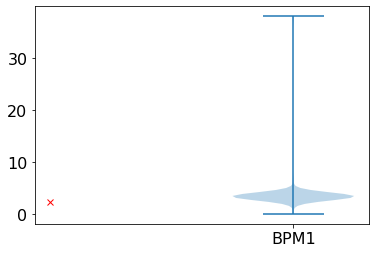

In [128]:
fig, ax = plt.subplots()

ax.violinplot(df_filtered_after_10.HSigma1)
ax.set_xticks([1])
ax.set_xticklabels(["BPM1"])

ax.plot(df_filtered_after_10.HSigma1_MAD.iloc[0], c="r", marker="x")

(0.0, 10.0)

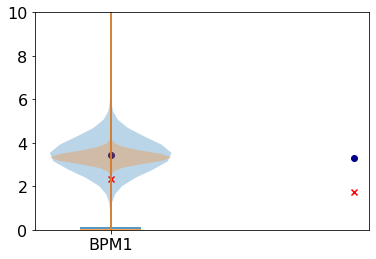

In [129]:
fig, ax = plt.subplots()

# Create violin plot
ax.violinplot(df_filtered_after_10.HSigma1)

# Add median point for measurement and simulation
ax.scatter(1, np.median(df_filtered_after_10.HSigma1), color='darkblue')
ax.scatter(1, np.median(df_filtered_after_10.HSigma1_MAD), c="r", marker="x")

ax.violinplot(df_filtered_after_10.HSigma2)
ax.scatter(2, np.median(df_filtered_after_10.HSigma2), color='darkblue')
ax.scatter(2, np.median(df_filtered_after_10.HSigma2_MAD), c="r", marker="x")

# Set x-ticks
ax.set_xticks([1])
ax.set_xticklabels(["BPM1"])

ax.set_ylim(0,10)

(0.0, 10.0)

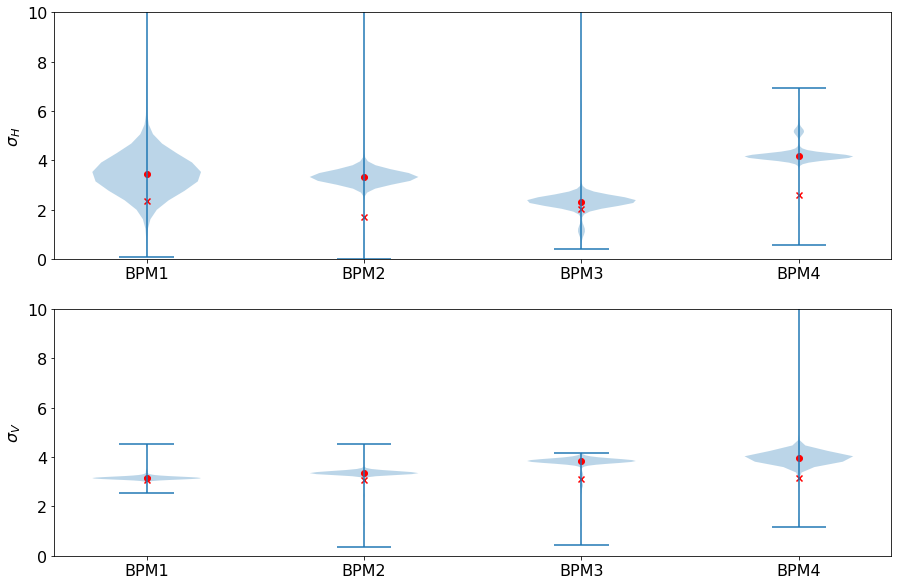

In [130]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

data = [df_filtered_after_10.HSigma1, df_filtered_after_10.HSigma2, 
        df_filtered_after_10.HSigma3, df_filtered_after_10.HSigma4]
medians = [np.median(i) for i in data]

data_sim = [df_filtered_after_10.HSigma1_MAD, df_filtered_after_10.HSigma2_MAD, 
        df_filtered_after_10.HSigma3_MAD, df_filtered_after_10.HSigma4_MAD]
medians_sim = [np.median(i) for i in data_sim]

# Create violin plots
parts = ax[0].violinplot(data, showmedians=False)

# Add median points
for i, median in enumerate(medians):
    ax[0].scatter(i+1, median, color='red')
for i, median_sim in enumerate(medians_sim):
    ax[0].scatter(i+1, median_sim, marker="x", color='red')

# Set x-ticks
ax[0].set_xticks(range(1, len(data)+1))
ax[0].set_xticklabels(["BPM1", "BPM2", "BPM3", "BPM4"], fontsize=16)

ax[0].set_ylabel("$\sigma_{H}$", fontsize=16)
ax[0].set_ylim(0,10)

# Vertical

data = [df_filtered_after_10.VSigma1, df_filtered_after_10.VSigma2, 
        df_filtered_after_10.VSigma3, df_filtered_after_10.VSigma4]
medians = [np.median(i) for i in data]

data_sim = [df_filtered_after_10.VSigma1_MAD, df_filtered_after_10.VSigma2_MAD, 
        df_filtered_after_10.VSigma3_MAD, df_filtered_after_10.VSigma4_MAD]
medians_sim = [np.median(i) for i in data_sim]

# Create violin plots
parts = ax[1].violinplot(data, showmedians=False)

# Add median points
for i, median in enumerate(medians):
    ax[1].scatter(i+1, median, color='red')
for i, median_sim in enumerate(medians_sim):
    ax[1].scatter(i+1, median_sim, marker="x", color='red')

# Set x-ticks
ax[1].set_xticks(range(1, len(data)+1))
ax[1].set_xticklabels(["BPM1", "BPM2", "BPM3", "BPM4"], fontsize=16)

ax[1].set_ylabel("$\sigma_{V}$", fontsize=16)
ax[1].set_ylim(0,10)




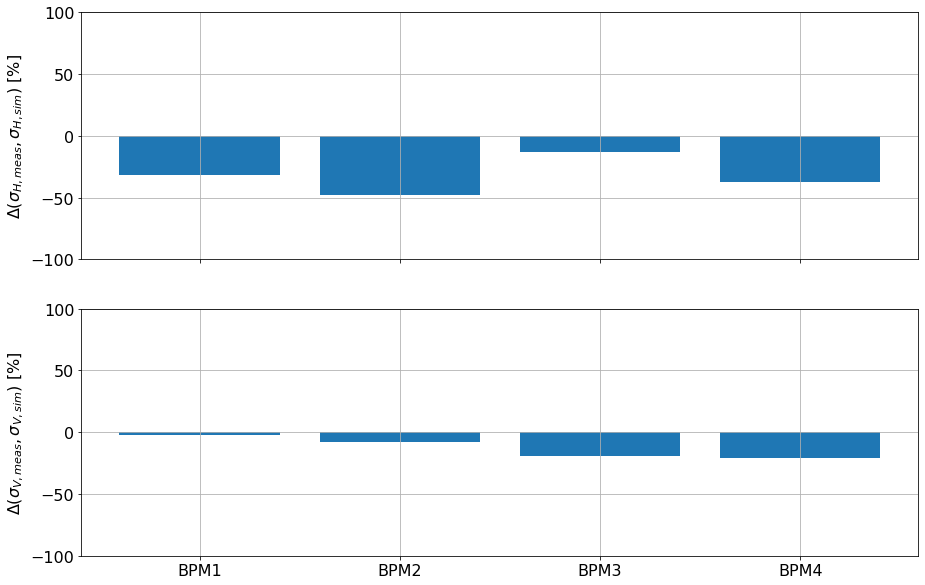

In [131]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,10))

# your data
data = [df_filtered_after_10.HSigma1, df_filtered_after_10.HSigma2, 
        df_filtered_after_10.HSigma3, df_filtered_after_10.HSigma4]
medians = [np.median(i) for i in data]

# simulated data
data_sim = [df_filtered_after_10.HSigma1_MAD, df_filtered_after_10.HSigma2_MAD, 
        df_filtered_after_10.HSigma3_MAD, df_filtered_after_10.HSigma4_MAD]
medians_sim = [np.median(i) for i in data_sim]

# calculate percentage differences
diffs = [(j-i)/i*100 for i, j in zip(medians, medians_sim)]

# plot differences
ax[0].bar(["BPM1", "BPM2", "BPM3", "BPM4"], diffs)
ax[0].set_ylabel('$\Delta(\sigma_{H,meas}, \sigma_{H,sim})$ [%]', fontsize=16)
#ax[0].set_title('Percentage Difference between beam size Measurement Medians and Simulation Medians')
ax[0].set_ylim(-100,100)
ax[0].grid()

# your data
data = [df_filtered_after_10.VSigma1, df_filtered_after_10.VSigma2, 
        df_filtered_after_10.VSigma3, df_filtered_after_10.VSigma4]
medians = [np.median(i) for i in data]

# simulated data
data_sim = [df_filtered_after_10.VSigma1_MAD, df_filtered_after_10.VSigma2_MAD, 
        df_filtered_after_10.VSigma3_MAD, df_filtered_after_10.VSigma4_MAD]
medians_sim = [np.median(i) for i in data_sim]

# calculate percentage differences
diffs = [(j-i)/i*100 for i, j in zip(medians, medians_sim)]

# plot differences
ax[1].bar(["BPM1", "BPM2", "BPM3", "BPM4"], diffs)
ax[1].set_ylabel('$\Delta(\sigma_{V,meas}, \sigma_{V,sim})$ [%]', fontsize=16)
ax[1].set_ylim(-100,100)
ax[1].grid()

plt.savefig("fig/percentage_diff_btw_sigma_meas_and_sim.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

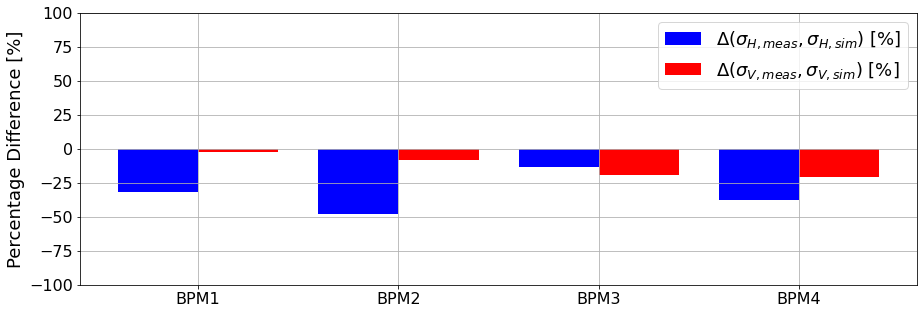

In [132]:
fig, ax = plt.subplots(figsize=(15,5))

# Your data
data_H = [df_filtered_after_10.HSigma1, df_filtered_after_10.HSigma2, 
        df_filtered_after_10.HSigma3, df_filtered_after_10.HSigma4]
medians_H = [np.median(i) for i in data_H]

data_V = [df_filtered_after_10.VSigma1, df_filtered_after_10.VSigma2, 
        df_filtered_after_10.VSigma3, df_filtered_after_10.VSigma4]
medians_V = [np.median(i) for i in data_V]

# Simulated data
data_sim_H = [df_filtered_after_10.HSigma1_MAD, df_filtered_after_10.HSigma2_MAD, 
        df_filtered_after_10.HSigma3_MAD, df_filtered_after_10.HSigma4_MAD]
medians_sim_H = [np.median(i) for i in data_sim_H]

data_sim_V = [df_filtered_after_10.VSigma1_MAD, df_filtered_after_10.VSigma2_MAD, 
        df_filtered_after_10.VSigma3_MAD, df_filtered_after_10.VSigma4_MAD]
medians_sim_V = [np.median(i) for i in data_sim_V]

# Calculate percentage differences
diffs_H = [(j-i)/i*100 for i, j in zip(medians_H, medians_sim_H)]
diffs_V = [(j-i)/i*100 for i, j in zip(medians_V, medians_sim_V)]

# Define labels
labels = ["BPM1", "BPM2", "BPM3", "BPM4"]

# Define bar width and positions
width = 0.4  # adjust as necessary
bar_pos = np.arange(len(labels))

# Plot differences
ax.bar(bar_pos - width/2, diffs_H, width, label='$\Delta(\sigma_{H,meas}, \sigma_{H,sim})$ [%]', alpha=1, color="b")
ax.bar(bar_pos + width/2, diffs_V, width, label='$\Delta(\sigma_{V,meas}, \sigma_{V,sim})$ [%]', alpha=1, color="r")

ax.set_ylabel('Percentage Difference [%]')
ax.set_xticks(bar_pos)
ax.set_xticklabels(labels)
ax.set_ylim(-100,100)
ax.legend()
ax.grid()

plt.savefig("fig/percentage_diff_btw_sigma_meas_and_sim.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

# Separate the dataframe into different optics

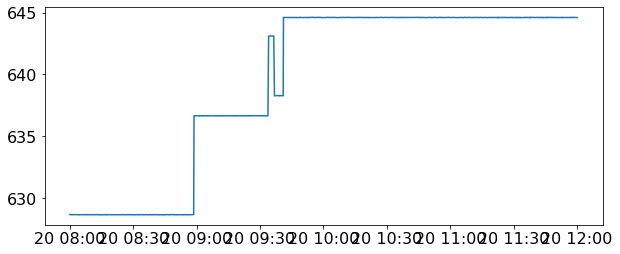

In [133]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df_filtered.datetime, df_filtered.iQFN1)

In [134]:
def label_set(df, column, threshold):
    # Calculate difference between consecutive rows
    df['diff'] = df[column].diff()
    # Identify rows where difference exceeds threshold
    df['change'] = df['diff'].abs() > threshold
    # Label each set
    df['set'] = df['change'].cumsum() + 1
    # Drop helper columns
    df = df.drop(columns=['diff', 'change'])
    return df

df_filtered = label_set(df_filtered, 'iQFN1', threshold=0.1)  # Adjust threshold as necessary


/tmp/ipykernel_12434/2137754299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df[column].diff()
/tmp/ipykernel_12434/2137754299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['diff'].abs() > threshold
/tmp/ipykernel_12434/2137754299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

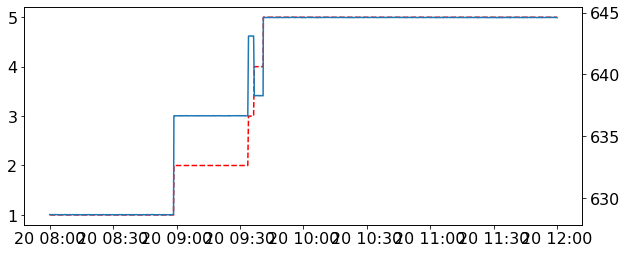

In [135]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df_filtered.datetime, df_filtered.set, color="r", linestyle="--")

ax2 = ax.twinx()
ax2.plot(df_filtered.datetime, df_filtered.iQFN1)

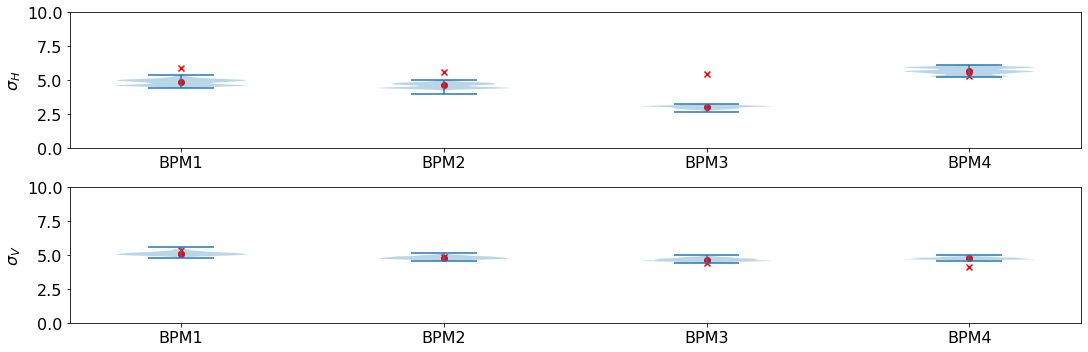

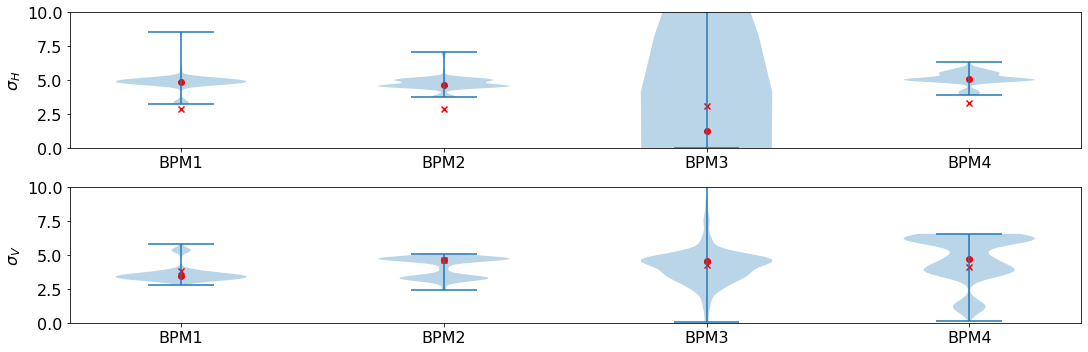

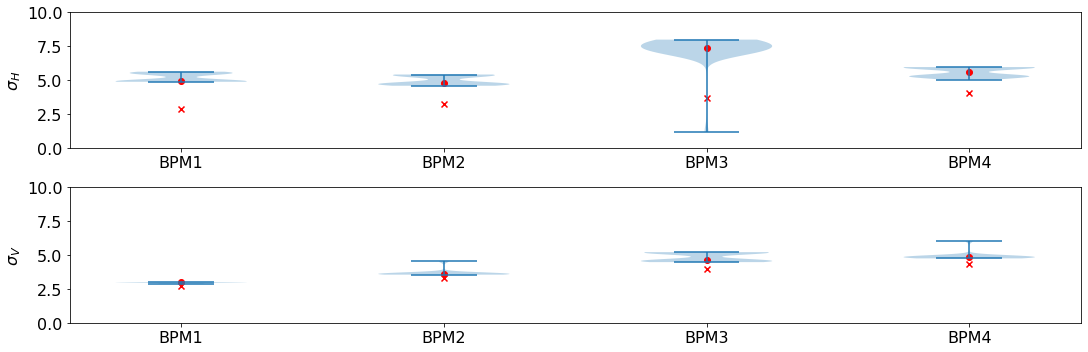

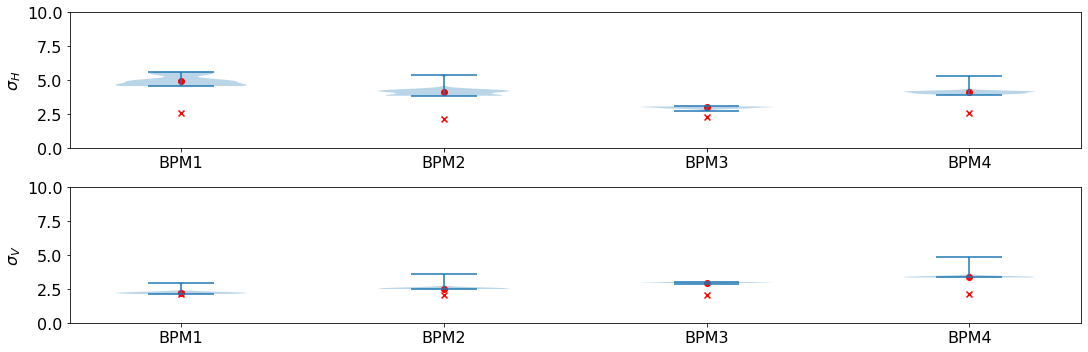

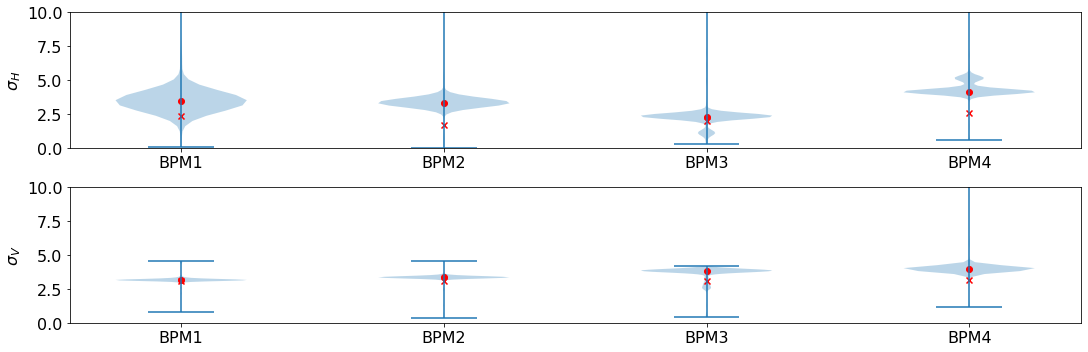

In [136]:
def plot_violin(df, ax):
    data_h = [df.HSigma1, df.HSigma2, df.HSigma3, df.HSigma4]
    medians_h = [np.median(i) for i in data_h]
    data_h_sim = [df.HSigma1_MAD, df.HSigma2_MAD, df.HSigma3_MAD, df.HSigma4_MAD]
    medians_h_sim = [np.median(i) for i in data_h_sim]

    
    
    ax[0].violinplot(data_h, showmedians=False)
    for i, (median, median_sim) in enumerate(zip(medians_h, medians_h_sim)):
        ax[0].scatter(i+1, median, color='red')
        ax[0].scatter(i+1, median_sim, marker="x", color='red')

    ax[0].set_xticks(range(1, len(data_h)+1))
    ax[0].set_xticklabels(["BPM1", "BPM2", "BPM3", "BPM4"], fontsize=16)
    ax[0].set_ylabel("$\sigma_{H}$", fontsize=16)
    ax[0].set_ylim(0,10)

    data_v = [df.VSigma1, df.VSigma2, df.VSigma3, df.VSigma4]
    medians_v = [np.median(i) for i in data_v]
    data_v_sim = [df.VSigma1_MAD, df.VSigma2_MAD, df.VSigma3_MAD, df.VSigma4_MAD]
    medians_v_sim = [np.median(i) for i in data_v_sim]

    ax[1].violinplot(data_v, showmedians=False)
    for i, (median, median_sim) in enumerate(zip(medians_v, medians_v_sim)):
        ax[1].scatter(i+1, median, color='red')
        ax[1].scatter(i+1, median_sim, marker="x", color='red')

    ax[1].set_xticks(range(1, len(data_v)+1))
    ax[1].set_xticklabels(["BPM1", "BPM2", "BPM3", "BPM4"], fontsize=16)
    ax[1].set_ylabel("$\sigma_{V}$", fontsize=16)
    ax[1].set_ylim(0,10)

    plt.tight_layout()
    plt.show()

for set_number in df_filtered['set'].unique():
    df_subset = df_filtered[df_filtered['set'] == set_number]
    fig, ax = plt.subplots(2,1, figsize=(15,5))
    plot_violin(df_subset, ax)


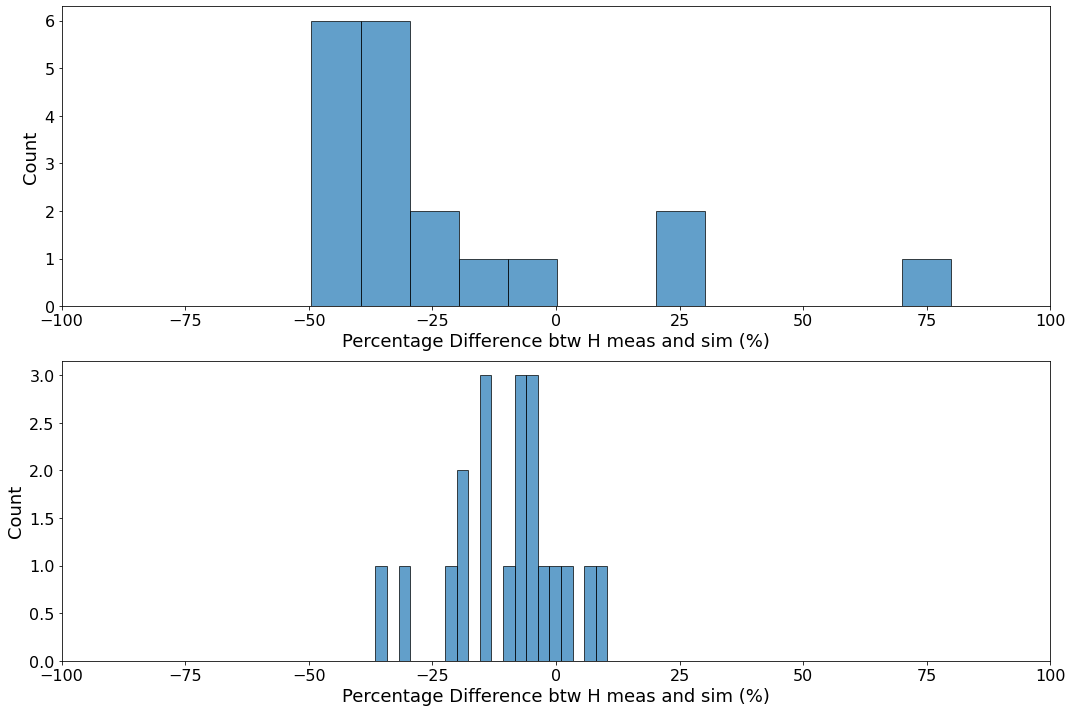

In [137]:
def calculate_differences(df, column_prefix):
    # Prepare data
    data = [df[f"{column_prefix}Sigma1"], df[f"{column_prefix}Sigma2"], 
            df[f"{column_prefix}Sigma3"], df[f"{column_prefix}Sigma4"]]
    medians = [np.median(i) for i in data]

    data_sim = [df[f"{column_prefix}Sigma1_MAD"], df[f"{column_prefix}Sigma2_MAD"], 
                df[f"{column_prefix}Sigma3_MAD"], df[f"{column_prefix}Sigma4_MAD"]]
    medians_sim = [np.median(i) for i in data_sim]

    # Calculate percentage differences
    diffs = [(j-i)/i*100 for i, j in zip(medians, medians_sim)]
    
    return diffs

# Calculate differences
h_diffs = []
v_diffs = []
for set_number in df_filtered['set'].unique():
    df_subset = df_filtered[df_filtered['set'] == set_number]
    h_diffs.extend(calculate_differences(df_subset, 'H'))
    v_diffs.extend(calculate_differences(df_subset, 'V'))

# Plot histograms
fig, ax = plt.subplots(2,1, figsize=(15,10))

ax[0].hist(h_diffs, bins=20, alpha=0.7, edgecolor='black')
ax[0].set_xlabel('Percentage Difference btw H meas and sim (%)')
ax[0].set_ylabel('Count')
ax[0].set_xlim(-100, 100)

ax[1].hist(v_diffs, bins=20, alpha=0.7, edgecolor='black')
ax[1].set_xlabel('Percentage Difference btw H meas and sim (%)')
ax[1].set_ylabel('Count')
ax[1].set_xlim(-100, 100)

plt.tight_layout()
plt.show()


This is just some verification

77.452
149.681
-49.496
-24.816999999999993
-12.863


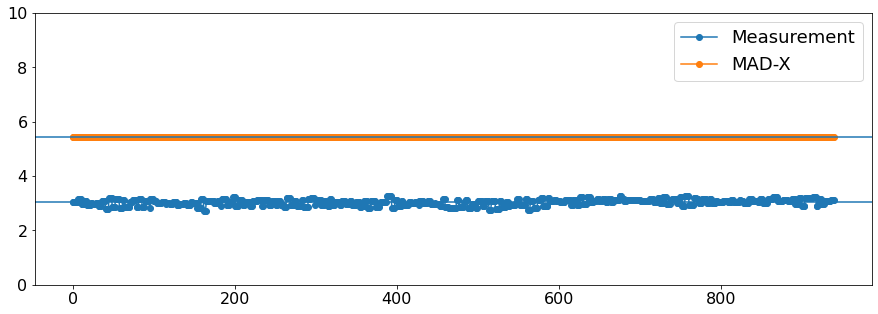

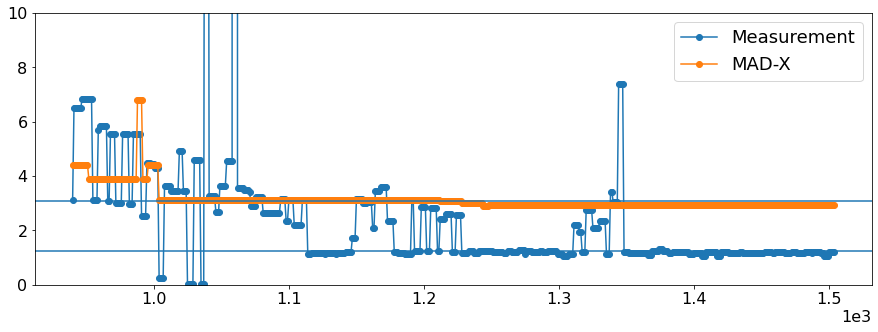

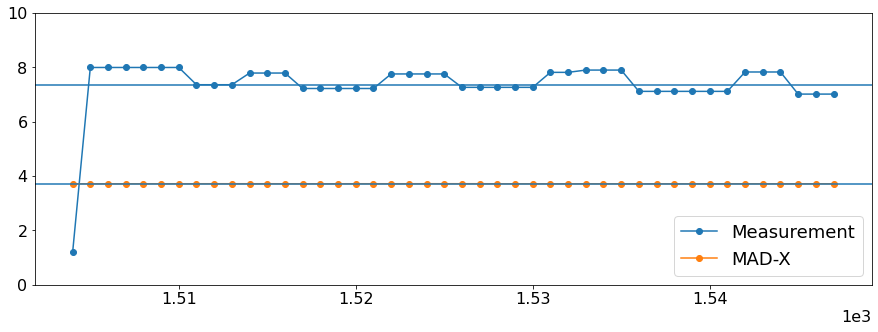

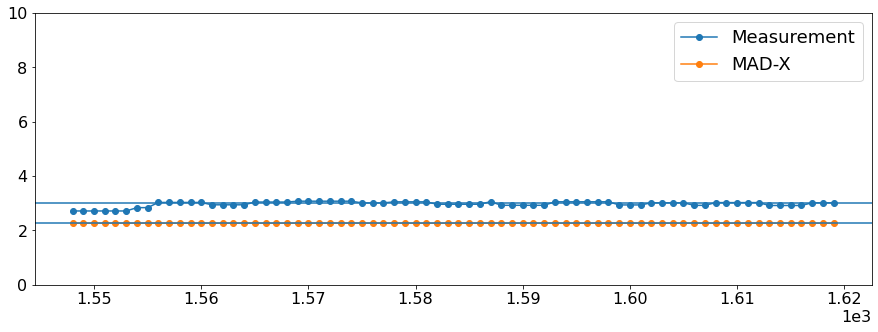

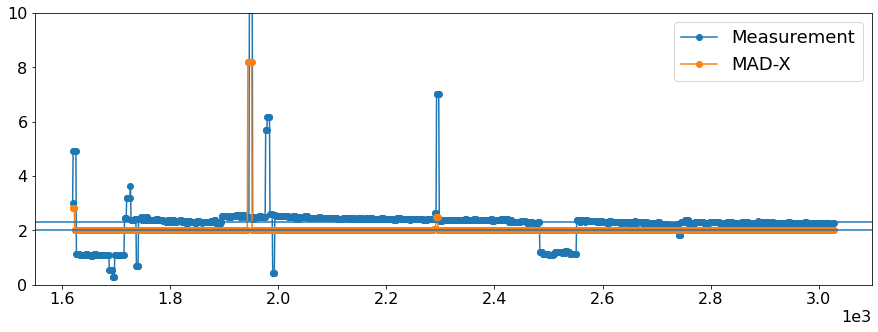

In [138]:
for set_number in df_filtered['set'].unique():
    df_subset = df_filtered[df_filtered['set'] == set_number]
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df_subset.HSigma3, marker="o", label="Measurement")
    ax.plot(df_subset.HSigma3_MAD, marker="o", label="MAD-X")
    ax.axhline(np.median(df_subset.HSigma3))
    ax.axhline(np.median(df_subset.HSigma3_MAD))
    
    print(round(np.median(df_subset.HSigma3_MAD)*100/np.median(df_subset.HSigma3),3)-100)
    
    ax.set_ylim(0,10)
    ax.legend()

In [139]:
deltaH_list = []

for set_number in df_filtered['set'].unique():
    df_subset = df_filtered[df_filtered['set'] == set_number]
    
    deltaH_list.append(np.median(df_subset.HSigma1_MAD)*100/np.median(df_subset.HSigma1)-100)
    deltaH_list.append(np.median(df_subset.HSigma2_MAD)*100/np.median(df_subset.HSigma2)-100)
    deltaH_list.append(np.median(df_subset.HSigma3_MAD)*100/np.median(df_subset.HSigma3)-100)
    deltaH_list.append(np.median(df_subset.HSigma4_MAD)*100/np.median(df_subset.HSigma4)-100)
    
    
#     print(round(np.median(df_subset.HSigma1_MAD)*100/np.median(df_subset.HSigma1)-100,2))
#     print(round(np.median(df_subset.HSigma2_MAD)*100/np.median(df_subset.HSigma2)-100,2))
#     print(round(np.median(df_subset.HSigma3_MAD)*100/np.median(df_subset.HSigma3)-100,2))
#     print(round(np.median(df_subset.HSigma4_MAD)*100/np.median(df_subset.HSigma4)-100,2))
#     print("")

In [140]:
deltaV_list = []

for set_number in df_filtered['set'].unique():
    df_subset = df_filtered[df_filtered['set'] == set_number]
    
    deltaV_list.append(np.median(df_subset.VSigma1_MAD)*100/np.median(df_subset.VSigma1)-100)
    deltaV_list.append(np.median(df_subset.VSigma2_MAD)*100/np.median(df_subset.VSigma2)-100)
    deltaV_list.append(np.median(df_subset.VSigma3_MAD)*100/np.median(df_subset.VSigma3)-100)
    deltaV_list.append(np.median(df_subset.VSigma4_MAD)*100/np.median(df_subset.VSigma4)-100)
    
    
#     print(round(np.median(df_subset.VSigma1_MAD)*100/np.median(df_subset.VSigma1)-100,2))
#     print(round(np.median(df_subset.VSigma2_MAD)*100/np.median(df_subset.VSigma2)-100,2))
#     print(round(np.median(df_subset.VSigma3_MAD)*100/np.median(df_subset.VSigma3)-100,2))
#     print(round(np.median(df_subset.VSigma4_MAD)*100/np.median(df_subset.VSigma4)-100,2))
#     print("")

(-100.0, 100.0)

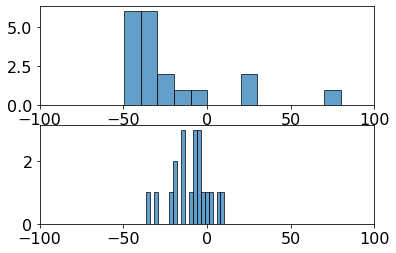

In [141]:
fig, ax = plt.subplots(2,1)
ax[0].hist(deltaH_list, bins=20, alpha=0.7, edgecolor='black')
ax[0].set_xlim(-100, 100)

ax[1].hist(deltaV_list, bins=20, alpha=0.7, edgecolor='black')
ax[1].set_xlim(-100, 100)

# Nice plot of the IRRAD BPM comparing the measurement beam size with the simulation beam size

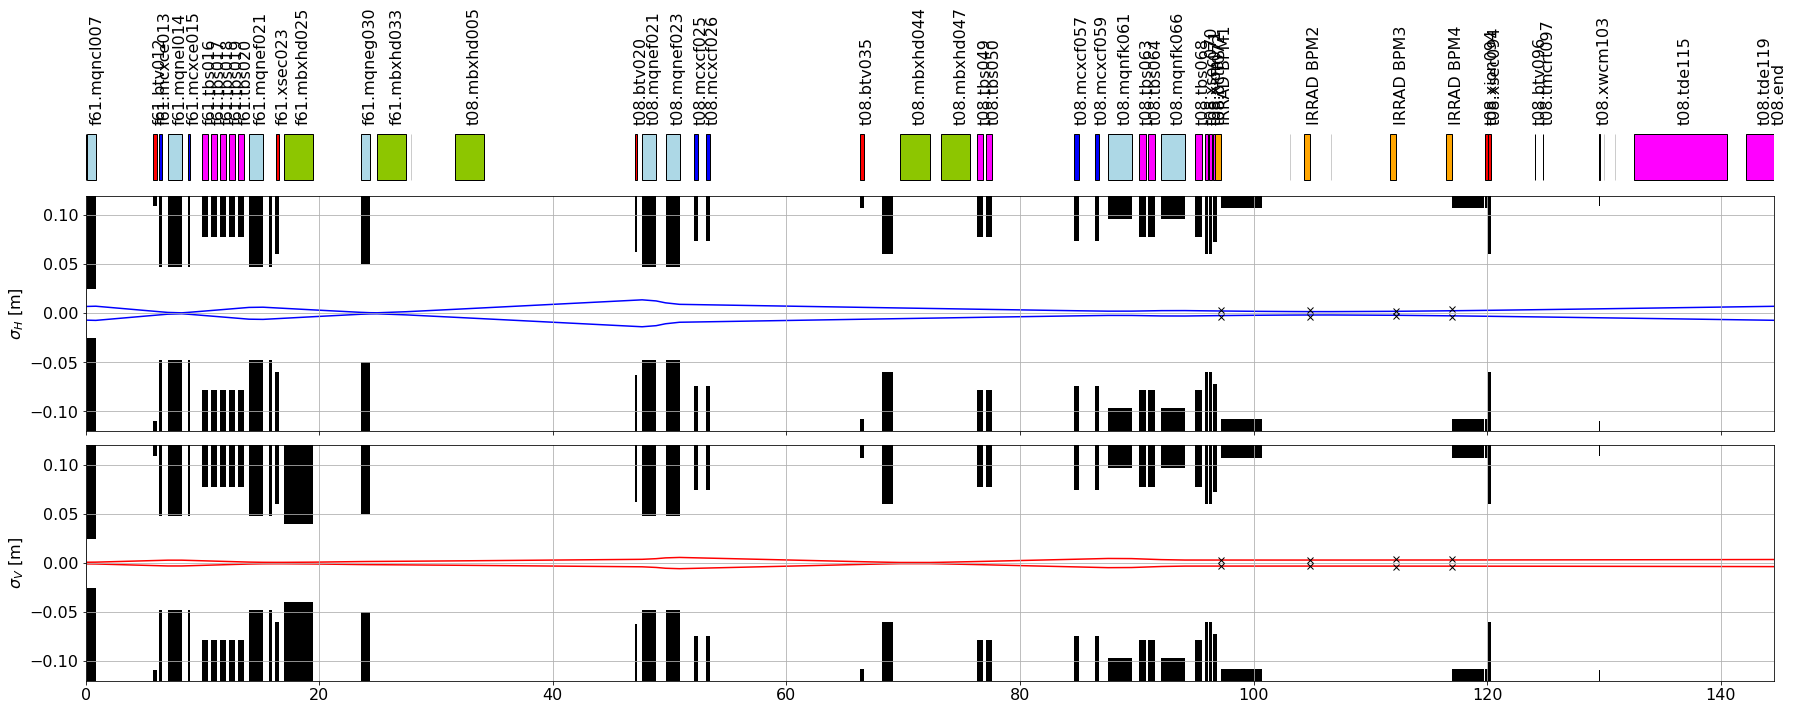

In [142]:
acq_number = 2000

madx.input("kQFN1 = " + str(df_filtered.k1_QFN1[acq_number]) + ";")
madx.input("kQDN2 = " + str(-df_filtered.k1_QDN2[acq_number]) + ";")
madx.input("kQFN3 = " + str(df_filtered.k1_QFN3[acq_number]) + ";")
madx.input("kQDN4 = " + str(-df_filtered.k1_QDN4[acq_number]) + ";")
madx.input("kQFN5 = " + str(df_filtered.k1_QFN5[acq_number]) + ";")
madx.input("kQDN6 = " + str(-df_filtered.k1_QDN6[acq_number]) + ";")
madx.input("kQDN7 = " + str(-df_filtered.k1_QDN7[acq_number]) + ";")
madx.input("kQFN8 = " + str(df_filtered.k1_QFN8[acq_number]) + ";")

fig, ax = plt.subplots(3,1, figsize=(25,10), tight_layout=False, sharex=True, height_ratios=[1,3,3])

twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

draw_synoptic(ax[0], twiss_f61)
ax[0].set_xlim(0, twiss_f61.s[-1])
ax[0].set_ylim(-0.02, 1.)
ax[0].axis("off")

ax[1].plot(twiss_f61['s'], beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, 1), alpha=1.0, color="b",
           zorder=0)
ax[1].plot(twiss_f61['s'], -beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, 1), alpha=1.0, color="b",
           zorder=0)
draw_aperture_circle(ax[1], twiss_f61, "aper_1")
draw_aperture_rectangle(ax[1], twiss_f61, "aper_1")

# IRRAD BPM
plot_data(ax[1], twiss_f61.loc["t08.bpm073"].s, df_filtered.HSigma1[acq_number] / 1000)
plot_data(ax[1], twiss_f61.loc["t08.bpm080"].s, df_filtered.HSigma2[acq_number] / 1000)
plot_data(ax[1], twiss_f61.loc["t08.bpm085"].s, df_filtered.HSigma3[acq_number] / 1000)
plot_data(ax[1], twiss_f61.loc["t08.bpm092"].s, df_filtered.HSigma4[acq_number] / 1000)

ax[1].set_xlim(0, twiss_f61.s[-1])

ax[2].plot(twiss_f61['s'], beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, 1) + twiss_f61.y, alpha=1.0,
           color="r", zorder=0)
ax[2].plot(twiss_f61['s'], -beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, 1) + twiss_f61.y, alpha=1.0,
           color="r", zorder=0)
draw_aperture_circle(ax[2], twiss_f61, "aper_1")
draw_aperture_rectangle(ax[2], twiss_f61, "aper_2")
plot_data(ax[2], twiss_f61.loc["t08.bpm073"].s, df_filtered.VSigma1[acq_number] / 1000)
plot_data(ax[2], twiss_f61.loc["t08.bpm080"].s, df_filtered.VSigma2[acq_number] / 1000)
plot_data(ax[2], twiss_f61.loc["t08.bpm085"].s, df_filtered.VSigma3[acq_number] / 1000)
plot_data(ax[2], twiss_f61.loc["t08.bpm092"].s, df_filtered.VSigma4[acq_number] / 1000)
ax[2].set_xlim(0, twiss_f61.s[-1])

ax[1].grid()
ax[1].set_ylim(-0.12, 0.12)
ax[1].set_ylabel(r"$\sigma_{H}$ [m]", fontsize=fontsize)

ax[2].grid()
ax[2].set_ylim(-0.12, 0.12)
ax[2].set_ylabel(r"$\sigma_{V}$ [m]", fontsize=fontsize)

plt.savefig("fig/t8_optics_with_measurement.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

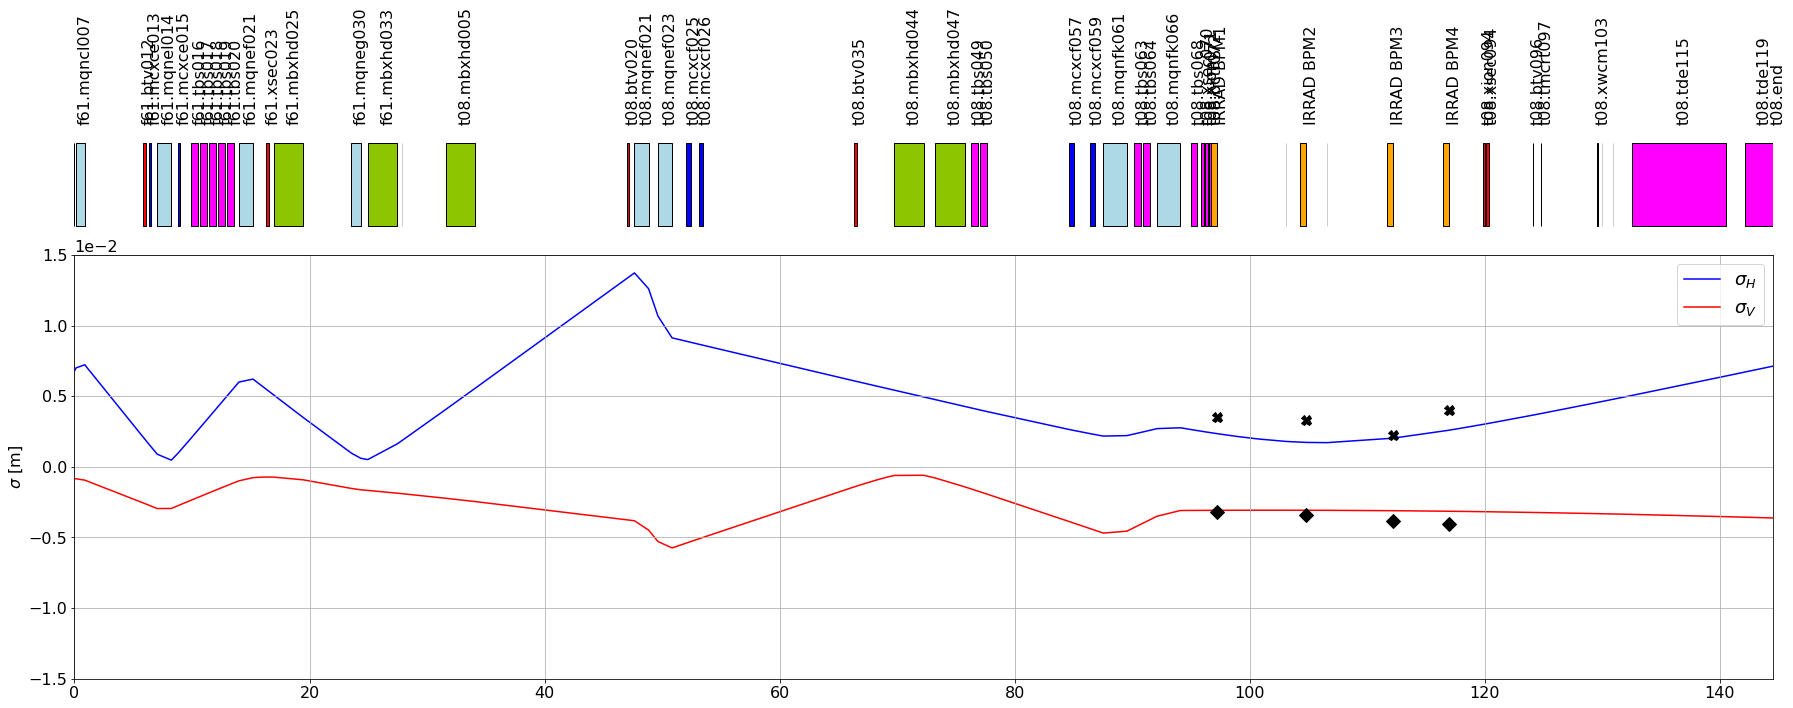

In [143]:
acq_number = 3000

madx.input("kQFN1 = " + str(df_filtered.k1_QFN1[acq_number]) + ";")
madx.input("kQDN2 = " + str(-df_filtered.k1_QDN2[acq_number]) + ";")
madx.input("kQFN3 = " + str(df_filtered.k1_QFN3[acq_number]) + ";")
madx.input("kQDN4 = " + str(-df_filtered.k1_QDN4[acq_number]) + ";")
madx.input("kQFN5 = " + str(df_filtered.k1_QFN5[acq_number]) + ";")
madx.input("kQDN6 = " + str(-df_filtered.k1_QDN6[acq_number]) + ";")
madx.input("kQDN7 = " + str(-df_filtered.k1_QDN7[acq_number]) + ";")
madx.input("kQFN8 = " + str(df_filtered.k1_QFN8[acq_number]) + ";")

fig, ax = plt.subplots(2,1, figsize=(25,10), tight_layout=False, sharex=True, height_ratios=[1,3])

twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

draw_synoptic(ax[0], twiss_f61)
ax[0].set_xlim(0, twiss_f61.s[-1])
ax[0].set_ylim(-0.02, 1.)
ax[0].axis("off")

ax[1].plot(twiss_f61['s'], beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, 1), alpha=1.0, color="b",
           zorder=0, label="$\sigma_{H}$")

# IRRAD BPM
ax[1].plot(twiss_f61.loc["t08.bpm073"].s, df_filtered.HSigma1[acq_number] / 1000, markersize=10, marker="X", color="k")
ax[1].plot(twiss_f61.loc["t08.bpm080"].s, df_filtered.HSigma2[acq_number] / 1000, markersize=10, marker="X", color="k")
ax[1].plot(twiss_f61.loc["t08.bpm085"].s, df_filtered.HSigma3[acq_number] / 1000, markersize=10, marker="X", color="k")
ax[1].plot(twiss_f61.loc["t08.bpm092"].s, df_filtered.HSigma4[acq_number] / 1000, markersize=10, marker="X", color="k")

ax[1].set_xlim(0, twiss_f61.s[-1])


ax[1].plot(twiss_f61['s'], -beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, 1) + twiss_f61.y, alpha=1.0,
           color="r", zorder=0, label="$\sigma_{V}$")

ax[1].plot(twiss_f61.loc["t08.bpm073"].s, -df_filtered.VSigma1[acq_number] / 1000, markersize=10, marker="D", color="k")
ax[1].plot(twiss_f61.loc["t08.bpm080"].s, -df_filtered.VSigma2[acq_number] / 1000, markersize=10, marker="D", color="k")
ax[1].plot(twiss_f61.loc["t08.bpm085"].s, -df_filtered.VSigma3[acq_number] / 1000, markersize=10, marker="D", color="k")
ax[1].plot(twiss_f61.loc["t08.bpm092"].s, -df_filtered.VSigma4[acq_number] / 1000, markersize=10, marker="D", color="k")


ax[1].grid()
ax[1].set_ylim(-0.015, 0.015)
ax[1].set_ylabel(r"$\sigma$ [m]", fontsize=fontsize)

ax[1].legend()
plt.savefig("fig/t8_optics_with_measurement_zoom.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

# This plot but with errors bars representing the one sigma from the measurements

In [144]:
np.std(df_filtered[df_filtered.set==5].HSigma1)
np.mean(df_filtered[df_filtered.set==5].HSigma1)

3.8217386016888426

In [145]:
import sys
sys.path.append("/eos/home-e/eljohnso/SWAN_projects/madx-tools")
import plot_tool
import importlib
importlib.reload(plot_tool)
from plot_tool import *

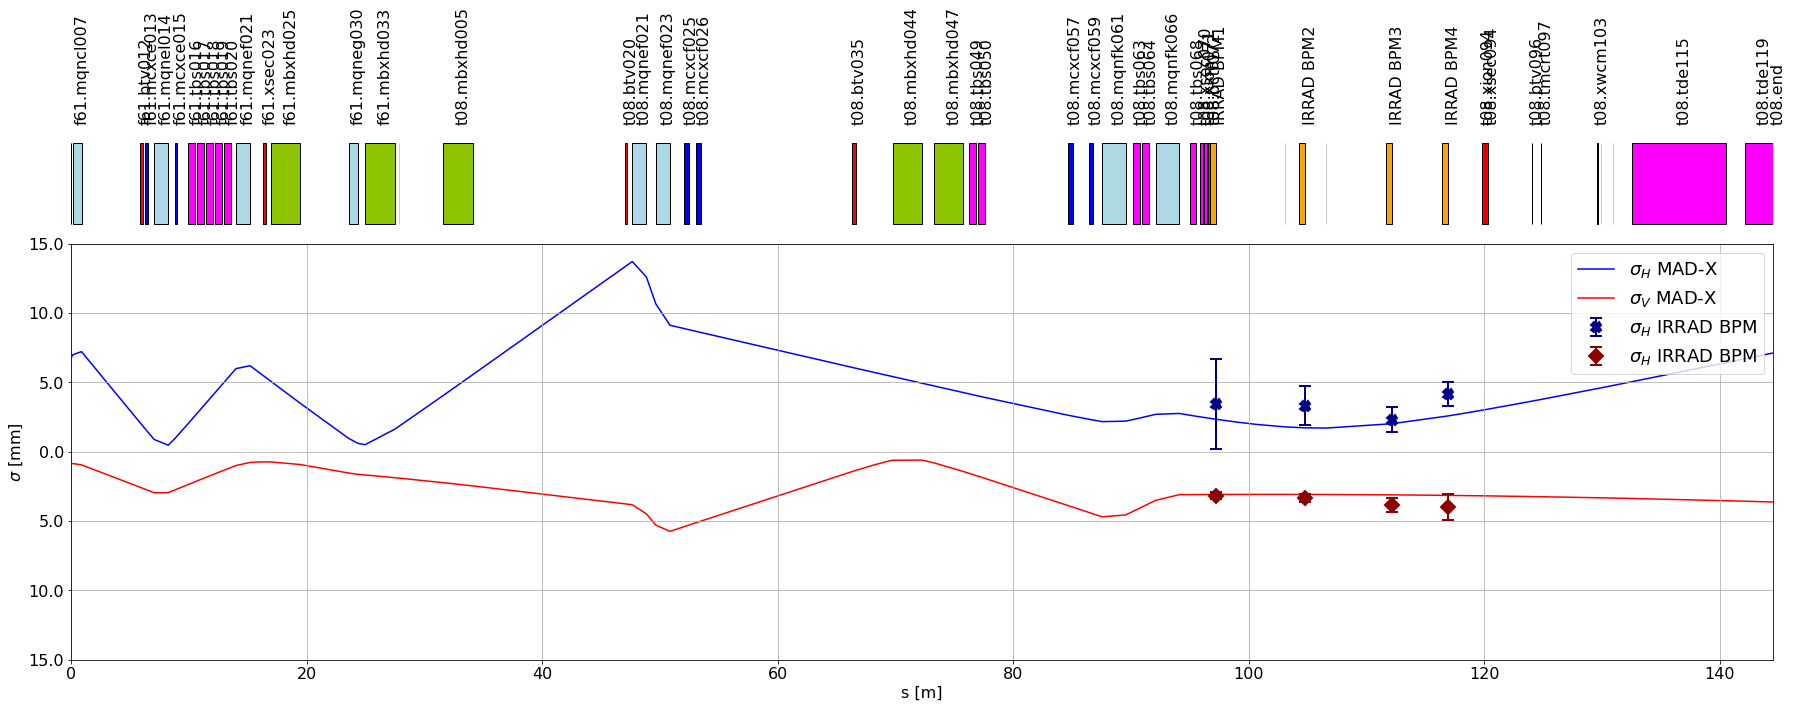

In [146]:
madx.input("kQFN1 = " + str(0.49169) + ";")
madx.input("kQDN2 = " + str(-0.18725) + ";")
madx.input("kQFN3 = " + str(0.2142) + ";")
madx.input("kQDN4 = " + str(-0.07838) + ";")
madx.input("kQFN5 = " + str(0.1877) + ";")
madx.input("kQDN6 = " + str(-0.1922) + ";")
madx.input("kQDN7 = " + str(-0.07342) + ";")
madx.input("kQFN8 = " + str(0.06299) + ";")

from matplotlib.ticker import FuncFormatter

def custom_formatter(x, pos):
    return "{}".format(abs(x))

formatter = FuncFormatter(custom_formatter)

fig, ax = plt.subplots(2,1, figsize=(25,10), tight_layout=False, sharex=True, height_ratios=[1,3])

# twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

draw_synoptic(ax[0], twiss_f61)
ax[0].set_xlim(0, twiss_f61.s[-1])
ax[0].set_ylim(-0.02, 1.)
ax[0].axis("off")

ax[1].plot(twiss_f61['s'], beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, 1)*1000, alpha=1.0, color="b", zorder=0, label="$\sigma_{H}$ MAD-X")

# IRRAD BPM
ax[1].errorbar(twiss_f61.loc["t08.bpm073"].s, np.median(df_filtered[df_filtered.set==5].HSigma1), yerr=np.std(df_filtered[df_filtered.set==5].HSigma1), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2, label="$\sigma_{H}$ IRRAD BPM")
ax[1].errorbar(twiss_f61.loc["t08.bpm080"].s, np.median(df_filtered[df_filtered.set==5].HSigma2), yerr=np.std(df_filtered[df_filtered.set==5].HSigma2), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm085"].s, np.median(df_filtered[df_filtered.set==5].HSigma3), yerr=np.std(df_filtered[df_filtered.set==5].HSigma3), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm092"].s, np.median(df_filtered[df_filtered.set==5].HSigma4), yerr=np.std(df_filtered[df_filtered.set==5].HSigma4), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)

ax[1].set_xlim(0, twiss_f61.s[-1])

ax[1].plot(twiss_f61['s'], -beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, 1)*1000, alpha=1.0, color="r", zorder=0, label="$\sigma_{V}$ MAD-X")

ax[1].errorbar(twiss_f61.loc["t08.bpm073"].s, -np.median(df_filtered[df_filtered.set==5].VSigma1), yerr=np.std(df_filtered[df_filtered.set==5].VSigma1), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2, label="$\sigma_{H}$ IRRAD BPM")
ax[1].errorbar(twiss_f61.loc["t08.bpm080"].s, -np.median(df_filtered[df_filtered.set==5].VSigma2), yerr=np.std(df_filtered[df_filtered.set==5].VSigma2), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm085"].s, -np.median(df_filtered[df_filtered.set==5].VSigma3), yerr=np.std(df_filtered[df_filtered.set==5].VSigma3), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm092"].s, -np.median(df_filtered[df_filtered.set==5].VSigma4), yerr=np.std(df_filtered[df_filtered.set==5].VSigma4), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)

ax[1].grid()
ax[1].set_ylim(-15, 15)
ax[1].set_ylabel(r"$\sigma$ [mm]", fontsize=fontsize)
ax[1].set_xlabel("s [m]", fontsize=fontsize)

ax[1].yaxis.set_major_formatter(formatter)

ax[1].legend(loc="upper right")
plt.savefig("fig/t8_optics_with_measurement_zoom.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

Text(0, 0.5, 'mm')

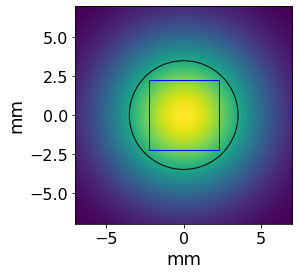

In [147]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

# Set ellipse parameters
horizontal_sigma = df_filtered.HSigma1[acq_number]
vertical_sigma = df_filtered.HSigma1[acq_number]
center = (0,0)

# Set up grid for ellipse and Gaussian
x, y = np.mgrid[-horizontal_sigma*2:horizontal_sigma*2:.01, -vertical_sigma*2:vertical_sigma*2:.01]
pos = np.dstack((x, y))

# Create a 2D Gaussian with the same sigmas as the ellipse
rv = multivariate_normal(mean=center, cov=[[horizontal_sigma**2, 0], [0, vertical_sigma**2]])

# Create a figure and an axes
fig, ax = plt.subplots(1, 1)

# Plot the Gaussian as an image, which will serve as the colored backdrop
plt.imshow(rv.pdf(pos), extent=(-horizontal_sigma*2, horizontal_sigma*2, -vertical_sigma*2, vertical_sigma*2), origin='lower')

# Add the ellipse
ellipse = Ellipse(center, 2*horizontal_sigma, 2*vertical_sigma, edgecolor='black', fill=False)
ax.add_patch(ellipse)

# Set square parameters
square_side = 4.5

# Add the square
square = Rectangle((center[0] - square_side / 2, center[1] - square_side / 2), square_side, square_side, edgecolor='blue', fill=False)
ax.add_patch(square)

ax.set_xlabel("mm")
ax.set_ylabel("mm")

# Added code from september 2023, perhaps it's bad code, to delete ?

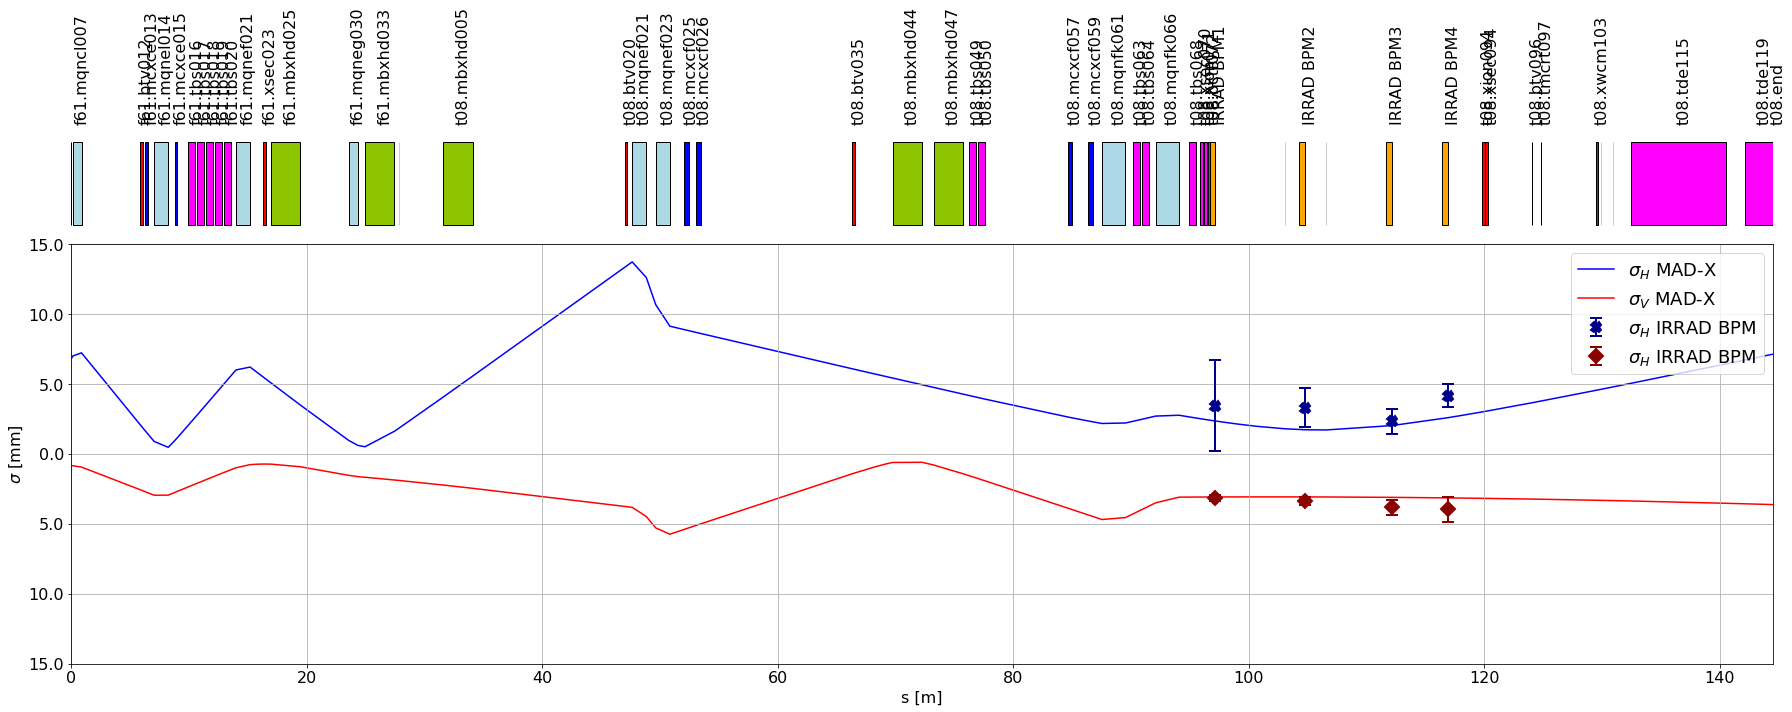

In [149]:
madx.input("kQFN1 = " + str(0.49169) + ";")
madx.input("kQDN2 = " + str(-0.18725) + ";")
madx.input("kQFN3 = " + str(0.2142) + ";")
madx.input("kQDN4 = " + str(-0.07838) + ";")
madx.input("kQFN5 = " + str(0.1877) + ";")
madx.input("kQDN6 = " + str(-0.1922) + ";")
madx.input("kQDN7 = " + str(-0.07342) + ";")
madx.input("kQFN8 = " + str(0.06299) + ";")

from matplotlib.ticker import FuncFormatter

def custom_formatter(x, pos):
    return "{}".format(abs(x))

formatter = FuncFormatter(custom_formatter)

fig, ax = plt.subplots(2,1, figsize=(25,10), tight_layout=False, sharex=True, height_ratios=[1,3])

# twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

draw_synoptic(ax[0], twiss_f61)
ax[0].set_xlim(0, twiss_f61.s[-1])
ax[0].set_ylim(-0.02, 1.)
ax[0].axis("off")

ax[1].plot(twiss_f61['s'], beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, 1)*1000, alpha=1.0, color="b", zorder=0, label="$\sigma_{H}$ MAD-X")

# IRRAD BPM
ax[1].errorbar(twiss_f61.loc["t08.bpm073"].s, np.median(df_filtered[df_filtered.set==5].HSigma1), yerr=np.std(df_filtered[df_filtered.set==5].HSigma1), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2, label="$\sigma_{H}$ IRRAD BPM")
ax[1].errorbar(twiss_f61.loc["t08.bpm080"].s, np.median(df_filtered[df_filtered.set==5].HSigma2), yerr=np.std(df_filtered[df_filtered.set==5].HSigma2), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm085"].s, np.median(df_filtered[df_filtered.set==5].HSigma3), yerr=np.std(df_filtered[df_filtered.set==5].HSigma3), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm092"].s, np.median(df_filtered[df_filtered.set==5].HSigma4), yerr=np.std(df_filtered[df_filtered.set==5].HSigma4), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)

ax[1].set_xlim(0, twiss_f61.s[-1])

ax[1].plot(twiss_f61['s'], -beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, 1)*1000, alpha=1.0, color="r", zorder=0, label="$\sigma_{V}$ MAD-X")

ax[1].errorbar(twiss_f61.loc["t08.bpm073"].s, -np.median(df_filtered[df_filtered.set==5].VSigma1), yerr=np.std(df_filtered[df_filtered.set==5].VSigma1), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2, label="$\sigma_{H}$ IRRAD BPM")
ax[1].errorbar(twiss_f61.loc["t08.bpm080"].s, -np.median(df_filtered[df_filtered.set==5].VSigma2), yerr=np.std(df_filtered[df_filtered.set==5].VSigma2), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm085"].s, -np.median(df_filtered[df_filtered.set==5].VSigma3), yerr=np.std(df_filtered[df_filtered.set==5].VSigma3), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm092"].s, -np.median(df_filtered[df_filtered.set==5].VSigma4), yerr=np.std(df_filtered[df_filtered.set==5].VSigma4), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)

ax[1].grid()
ax[1].set_ylim(-15, 15)
ax[1].set_ylabel(r"$\sigma$ [mm]", fontsize=fontsize)
ax[1].set_xlabel("s [m]", fontsize=fontsize)

ax[1].yaxis.set_major_formatter(formatter)

ax[1].legend(loc="upper right")

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from cpymad.madx import Madx
import pandas as pd
from pybt.tools.plotters import *
from madxtools.plot_tool import *
import requests

def manipulate_globals_and_return(madx, exn, eyn, p, beta, gamma, L, scattering=False):
    """
    This function manipulates the global variables of a MADX instance and returns the new beta functions and emittance.
    If the scattering parameter is set to True, it also calculates the new emittance due to scattering.

    Parameters:
    madx (cpymad.madx.Madx): An instance of the MADX class.
    exn (float): The normalized horizontal emittance.
    eyn (float): The normalized vertical emittance.
    p (float): The momentum of the beam.
    beta (float): The relativistic beta factor.
    gamma (float): The relativistic gamma factor.
    L (float): The length of the air region.
    scattering (bool): A boolean indicating whether to calculate the new emittance due to scattering.

    Returns:
    betx0 (float): The new horizontal beta function.
    bety0 (float): The new vertical beta function.
    alfx0 (float): The new horizontal alpha function.
    alfy0 (float): The new vertical alpha function.
    dx0 (float): The new horizontal dispersion.
    dy0 (float): The new vertical dispersion.
    dpx0 (float): The new horizontal momentum deviation.
    dpy0 (float): The new vertical momentum deviation.
    exn (float): The new horizontal emittance.
    eyn (float): The new vertical emittance.
    """

    madx.globals['betx0'] = 'savebeta_air->betx'
    madx.globals['bety0'] = 'savebeta_air->bety'
    madx.globals['alfx0'] = 'savebeta_air->alfx'
    madx.globals['alfy0'] = 'savebeta_air->alfy'
    madx.globals['dx0'] = 'savebeta_air->dx'
    madx.globals['dy0'] = 'savebeta_air->dy'
    madx.globals['dpx0'] = 'savebeta_air->dpx'
    madx.globals['dpy0'] = 'savebeta_air->dpy'

    if scattering==True:
        
        epsilon_0 = exn/(beta*gamma)
        epsilon_0_V = eyn/(beta*gamma)

        p_MeV = p*1000 # Beam total energy in MeV
        q = 1
        P = 1.01325 # Standard air pressure at sea level in Bar
        P = 1.025 # Standard air pressure at sea level in Bar
        P_Torr = P*750.062 # Standard air pressure at sea level in Torr
        L_rad0 = 301 # For air. Table with radiation lengths: https://cds.cern.ch/record/941314/files/p245.pdf
        L_rad = L_rad0/(P_Torr/760)

        theta_rms = (13.6/p_MeV*beta)*q*np.sqrt(L/L_rad)
        
        # New theta_rms version from PDG
        # https://pdg.lbl.gov/2017/AtomicNuclearProperties/HTML/air_dry_1_atm.html
#         L_rad = 36.6
#         theta_rms = (13.6/p_MeV*beta)*q*np.sqrt(L/L_rad)*(1+0.038*np.log(L/L_rad))

        # Horizontal
        gamma0 = (1 + madx.globals['alfx0']**2) / madx.globals['betx0']
        Delta_epsilon = (1/2)*theta_rms**2*(madx.globals['betx0'] + L*madx.globals['alfx0'] + (L**2/3)*gamma0)
        epsilon_1 = epsilon_0 + Delta_epsilon
        alfx0_1 = (epsilon_0*madx.globals['alfx0'] - (L/2)*theta_rms**2 ) / (epsilon_0 + Delta_epsilon)
        betx0_1 = (epsilon_0*madx.globals['betx0'] + (L**2/3)*theta_rms**2 ) / (epsilon_0 + Delta_epsilon)

        # Vertical
        gamma0_V = (1 + madx.globals['alfy0']**2) / madx.globals['bety0']
        Delta_epsilon_V = (1/2)*theta_rms**2*(madx.globals['bety0'] + L*madx.globals['alfy0'] + (L**2/3)*gamma0_V)
        epsilon_1_V = epsilon_0_V + Delta_epsilon_V
        alfy0_1 = (epsilon_0_V*madx.globals['alfy0'] - (L/2)*theta_rms**2 ) / (epsilon_0_V + Delta_epsilon_V)
        bety0_1 = (epsilon_0_V*madx.globals['bety0'] + (L**2/3)*theta_rms**2 ) / (epsilon_0_V + Delta_epsilon_V)

        # Return
        exn = epsilon_1*beta*gamma
        eyn = epsilon_1_V*beta*gamma
        betx0 = betx0_1
        alfx0 = alfx0_1
        bety0 = bety0_1
        alfy0 = alfy0_1
        
    else:
        betx0 = madx.globals['betx0']
        alfx0 = madx.globals['alfx0']
        bety0 = madx.globals['bety0']
        alfy0 = madx.globals['alfy0']
    
    dx0 = madx.globals['dx0']
    dy0 = madx.globals['dy0']
    dpx0 = madx.globals['dpx0']
    dpy0 = madx.globals['dpy0']

    return betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, exn, eyn

def add_air_region(madx, title, sequence, air_start_pos, air_stop_pos, steps):
    """
    This function adds an air region to the MADX sequence.

    Parameters:
    madx (cpymad.madx.Madx): An instance of the MADX class.
    air_start_pos (float): The starting position of the air region.
    air_stop_pos (float): The stopping position of the air region.
    steps (float): The distance between two consecutive inner markers.

    Returns:
    None
    """

    # Calculate the positions of the inner markers
    inner_marker_array = np.arange(air_start_pos+steps, air_stop_pos, steps)

    # Add the markers for the start and end of the air region
    madx.input(f'''
    AIR_START : MARKER;
    AIR_END : MARKER;
    ''')           

    # Install the markers for the start and end of the air region
    madx.input(f'''
    SEQEDIT, SEQUENCE={sequence};
    INSTALL, ELEMENT=AIR_START, CLASS=AIR_START, AT={air_start_pos};
    INSTALL, ELEMENT=AIR_END, CLASS=AIR_END, AT={air_stop_pos};
    ENDEDIT;
    ''')

    # Add the inner markers
    madx.input(f"SEQEDIT, SEQUENCE = {sequence};")
    # Create a for loop for the inner markers:
    for count, pos in enumerate(inner_marker_array):
        madx.input(f"INSTALL, ELEMENT=INNER_MARKER{str(count)}_{title}, CLASS=MARKER, AT={pos};")
        # print(f"INNER_MARKER{str(count)}")
    madx.input("ENDEDIT;")

    return

def add_hidden_marker(madx, sequence, start, stop, steps):
    # Add marker at the end of the line to see the evolution of the beam with fine resolution
    madx.input(f"SEQEDIT, SEQUENCE = {sequence};")
    for count, pos in enumerate(np.arange(start, stop, steps)):
        madx.input(f"INSTALL, ELEMENT=HIDDEN_MARKER{str(count)}, CLASS=MARKER, AT={pos};")
    madx.input("ENDEDIT;")

    return

def process_scattering(madx, exn, eyn, beta, gamma, sequence, end, p, twiss_initial, ex_initial, ey_initial):

    air_start_elements = [name for name in twiss_initial.name if "air_start" in name]
    # print(f"There are {len(air_start_elements)} air regions in the sequence: {air_start_elements}")

    air_start_numbers = [int(name.split(':')[1]) for name in air_start_elements]
    # print(f"The air regions are numbered: {air_start_numbers}")

    inner_elements = [name for name in twiss_initial.name if "inner" in name]

    def update_beam(madx, exn, eyn, beta, gamma, ex_list, ey_list):
        madx.command.beam(ex=exn/(beta*gamma), ey=eyn/(beta*gamma))
        ex_list.append(madx.sequence[sequence].beam.ex)
        ey_list.append(madx.sequence[sequence].beam.ey)
        return madx, ex_list, ey_list

    def append_twiss_to_list(madx, sequence, twiss_list, betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0):
        madx.use(sequence=sequence)
        twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
        twiss_list.append(twiss)
        return twiss_list

    twiss_list = []
    ex_list = []
    ey_list = []

    betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0, exn, eyn = manipulate_globals_and_return(madx, exn, eyn, p, beta, gamma, scattering=False, L=0)

    madx.input(f"SEQEDIT, SEQUENCE = {sequence};")
    madx.input(f"EXTRACT, SEQUENCE = {sequence}, FROM=AIR_START, TO={end}, NEWNAME=seq_air_start_to_end;")
    madx.input("ENDEDIT;")

    previous_seq_name = "seq_air_start_to_end"

    # Iterating over all air regions
    for air_region_number in air_start_numbers:
        # print(f"Entering air region {air_region_number}")

        if air_region_number == 1:
            air_start_pos = madx.sequence[sequence].elements["air_start"].position

        else:
            air_start_pos = madx.sequence[sequence].elements[f"air_start[{str(air_region_number)}]"].position

        print(air_start_pos)

        inner_marker_list = [name for name in inner_elements if name.endswith(f"{air_region_number}:1")]
        for i in range(len(inner_marker_list)):

            if i == 0:
                step = madx.sequence[sequence].elements[inner_marker_list[i][:-2]].position - air_start_pos
            else:
                step = madx.sequence[sequence].elements[inner_marker_list[i][:-2]].position - madx.sequence[sequence].elements[inner_marker_list[i-1][:-2]].position

            madx, ex_list, ey_list = update_beam(madx, exn, eyn, beta, gamma, ex_list, ey_list)

            # print(f"SAVEBETA at INNER_MARKER{str(i)}_{str(air_region_number)}")
            madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = INNER_MARKER{str(i)}_{str(air_region_number)}, SEQUENCE={previous_seq_name};")
            twiss_list = append_twiss_to_list(madx,previous_seq_name, twiss_list, betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0)
            betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0, exn, eyn = manipulate_globals_and_return(madx, exn, eyn, p, beta, gamma, scattering=True, L=step)

            # print(f"Extracting from INNER_MARKER{str(i)}_{str(air_region_number)} to {end}")
            madx.input(f"SEQEDIT, SEQUENCE = {previous_seq_name};")
            madx.input(f"EXTRACT, SEQUENCE= {previous_seq_name}, FROM=INNER_MARKER{str(i)}_{str(air_region_number)}, TO={end}, NEWNAME=seq_inner_marker{str(i)}_to_end;")
            madx.input("ENDEDIT;")

            previous_seq_name = f"seq_inner_marker{str(i)}_to_end"
        
        madx, ex_list, ey_list = update_beam(madx, exn, eyn, beta, gamma, ex_list, ey_list)

        #### Air_END ####
        # Final step calculation
        if air_region_number == 1:
            air_end_pos = madx.sequence[sequence].elements["air_end"].position
            step = air_end_pos - madx.sequence[sequence].elements[inner_marker_list[i][:-2]].position
        else:
            air_end_pos = madx.sequence[sequence].elements[f"air_end[{str(air_region_number)}]"].position
            step = air_end_pos - madx.sequence[sequence].elements[inner_marker_list[i][:-2]].position

        # print(f"SAVEBETA at AIR_END")
        if air_region_number == 0:
            madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_END, SEQUENCE={previous_seq_name};")
        else:
            madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_END[{str(air_region_number)}], SEQUENCE={previous_seq_name};")

        twiss_list = append_twiss_to_list(madx,previous_seq_name, twiss_list, betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0)
        betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0, exn, eyn = manipulate_globals_and_return(madx, exn, eyn, p, beta, gamma, scattering=True, L=step)
        
        madx.input(f"SEQEDIT, SEQUENCE = {previous_seq_name};")
        if air_region_number == 1:
            # print(f"Extracting from AIR_END to {end}")
            madx.input(f"EXTRACT, SEQUENCE= {previous_seq_name}, FROM=AIR_END, TO={end}, NEWNAME=seq_air_end_to_end;")
        else:
            # print(f"Extracting from AIR_END[{str(air_region_number)}] to {end}")
            madx.input(f"EXTRACT, SEQUENCE= {previous_seq_name}, FROM=AIR_END, TO={end}, NEWNAME=seq_air_end{str(air_region_number)}_to_end;")
        madx.input("ENDEDIT;")

        
        if air_region_number == 1:
            previous_seq_name = f"seq_air_end_to_end"
        else:
            previous_seq_name = f"seq_air_end{str(air_region_number)}_to_end"

        twiss_list = append_twiss_to_list(madx,previous_seq_name, twiss_list, betx0, bety0, alfx0, alfy0, Dx0, Dy0, Dpx0, Dpy0)
        madx, ex_list, ey_list = update_beam(madx, exn, eyn, beta, gamma, ex_list, ey_list)


    # Shift the s position so that is is coherent.
    for i in range(len(twiss_list)):
        twiss_list[i].s = twiss_list[i].s + twiss_initial.loc[twiss_list[i].iloc[1].name].s


    # We add the emittances to each twiss table
    twiss_initial['ex'] = ex_initial

    for i in range(len(twiss_list)):
        twiss_list[i]['ex'] = ex_list[i]

    twiss_initial['ey'] = ey_initial

    for i in range(len(twiss_list)):
        twiss_list[i]['ey'] = ey_list[i]

    # We remove the drifts as they are duplicated names
    def remove_drift_rows(df):
        df = df.loc[~df.index.str.startswith('drift')]
        df = df.loc[~df.index.str.startswith('#s')]
        return df

    twiss_list = [remove_drift_rows(df) for df in twiss_list]

    # We combine all the twiss tables into one
    def add_missing_rows(df1, df2):
        # Find rows in df1 with lower 's' than the minimum 's' in df2
        missing_rows = df1[df1['s'] < df2['s'].min()]
        
        # Append these rows to df2 and sort by 's'
        df2_updated = pd.concat([df2, missing_rows]).sort_values(by='s')

        return df2_updated

    # Loop through each element in the list
    for i in range(1, len(twiss_list)):
        twiss_list[i] = add_missing_rows(twiss_list[i-1], twiss_list[i])

    # Finaly, we add the initial twiss table to the beginning
    twiss_scattered = add_missing_rows(twiss_initial, twiss_list[-1])

    return twiss_initial, twiss_scattered


In [155]:
T = 23.08 # GeV kinetic energy
# T = 4.54 # GeV kinetic energy ion equivalent of 750 MeV/u
E0 = 0.938 # GeV/c^2 proton rest mass
E = T + E0 # total energy
gamma = E / E0 # gamma
beta = np.sqrt(1-gamma**(-2))
p = E*beta # GeV/c beam momentum

print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p,3)} GeV/c")

# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)


# Update quadrupole strength values
madx.input("kQFN1 = " + str(0.49169) + ";")
madx.input("kQDN2 = " + str(-0.18725) + ";")
madx.input("kQFN3 = " + str(0.2142) + ";")
madx.input("kQDN4 = " + str(-0.07838) + ";")
madx.input("kQFN5 = " + str(0.1877) + ";")
madx.input("kQDN6 = " + str(-0.1922) + ";")
madx.input("kQDN7 = " + str(-0.07342) + ";")
madx.input("kQFN8 = " + str(0.06299) + ";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# Make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")


twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

# Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p, twiss, ex_initial, ey_initial)

gamma = 25.606
beta = 0.999
p = 24.0 GeV/c
5.29992
15.693919999999995
95.5323672607514
96.0973672607514
96.43736726075139
96.81736726075138
100.67936726075138
120.04836726075136


9.036
5.213


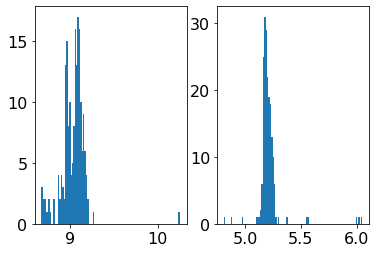

In [156]:
start = "2023-04-20 11:00:00.000"
end = "2023-04-20 12:00:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions").build().toPandas()
df = df.loc[df.selector == "CPS.USER.EAST3"]

# Histogram
fig, ax = plt.subplots(1,2)
ax[0].hist(df.HSigma, bins = 100);
ax[1].hist(df.VSigma, bins = 100);
# ax.set_xlim(3,50)

MWPC_HSigma_list = df.HSigma
MWPC_VSigma_list = df.VSigma
MWPC_HSigma = df.HSigma.mean()
MWPC_VSigma = df.VSigma.mean()
print(round(MWPC_HSigma,3))
print(round(MWPC_VSigma,3))

(-15.0, 15.0)

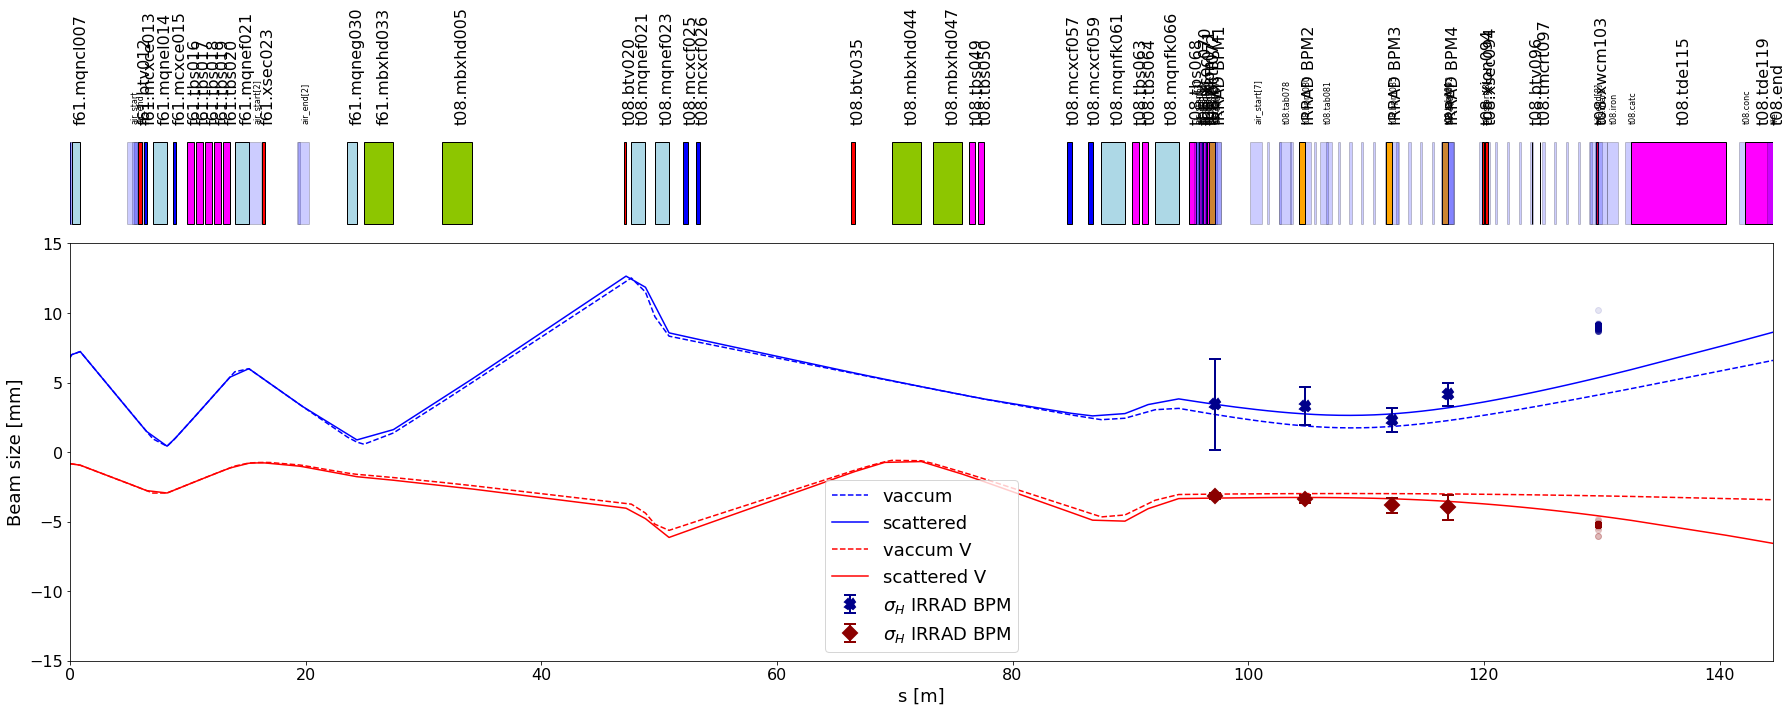

In [157]:
fig, ax = plt.subplots(2,1, figsize=(25,10), tight_layout=False, sharex=True, height_ratios=[1,3])

# Make the border of ax[0] invisible
for side in ['bottom', 'right', 'top', 'left']:
    ax[0].spines[side].set_visible(False)
draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss.s, 1000*beam_size(twiss.betx, twiss.dx, twiss.ex, sige, 1), ls="--", c="b", label='vaccum')
ax[1].plot(twiss_scattered.s, 1000*beam_size(twiss_scattered.betx, twiss_scattered.dx, twiss_scattered.ex, sige, 1), c="b", label='scattered')

ax[1].plot(twiss.s, -1000*beam_size(twiss.bety, twiss.dy, twiss.ey, sige, 1), ls="--", c="r", label='vaccum V')
ax[1].plot(twiss_scattered.s, -1000*beam_size(twiss_scattered.bety, twiss_scattered.dy, twiss_scattered.ey, sige, 1), c="r", label='scattered V')

# Measurements
# IRRAD BPM
ax[1].errorbar(twiss_f61.loc["t08.bpm073"].s, np.median(df_filtered[df_filtered.set==5].HSigma1), yerr=np.std(df_filtered[df_filtered.set==5].HSigma1), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2, label="$\sigma_{H}$ IRRAD BPM")
ax[1].errorbar(twiss_f61.loc["t08.bpm080"].s, np.median(df_filtered[df_filtered.set==5].HSigma2), yerr=np.std(df_filtered[df_filtered.set==5].HSigma2), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm085"].s, np.median(df_filtered[df_filtered.set==5].HSigma3), yerr=np.std(df_filtered[df_filtered.set==5].HSigma3), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm092"].s, np.median(df_filtered[df_filtered.set==5].HSigma4), yerr=np.std(df_filtered[df_filtered.set==5].HSigma4), fmt='X', markersize=10, color="darkblue", capsize=6, elinewidth=2, markeredgewidth=2)

ax[1].errorbar(twiss_f61.loc["t08.bpm073"].s, -np.median(df_filtered[df_filtered.set==5].VSigma1), yerr=np.std(df_filtered[df_filtered.set==5].VSigma1), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2, label="$\sigma_{H}$ IRRAD BPM")
ax[1].errorbar(twiss_f61.loc["t08.bpm080"].s, -np.median(df_filtered[df_filtered.set==5].VSigma2), yerr=np.std(df_filtered[df_filtered.set==5].VSigma2), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm085"].s, -np.median(df_filtered[df_filtered.set==5].VSigma3), yerr=np.std(df_filtered[df_filtered.set==5].VSigma3), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)
ax[1].errorbar(twiss_f61.loc["t08.bpm092"].s, -np.median(df_filtered[df_filtered.set==5].VSigma4), yerr=np.std(df_filtered[df_filtered.set==5].VSigma4), fmt='D', markersize=10, color="darkred", capsize=6, elinewidth=2, markeredgewidth=2)


ax[1].scatter([twiss.loc["t08.xwcm103"].s]*len(MWPC_HSigma_list), MWPC_HSigma_list, alpha=0.1, c="darkblue")
ax[1].scatter([twiss.loc["t08.xwcm103"].s]*len(MWPC_VSigma_list), -MWPC_VSigma_list, alpha=0.1, c="darkred")

ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('Beam size [mm]')
ax[1].legend()
ax[1].set_ylim(-15, 15)